### 0. Download dataset

In [2]:
!pip install roboflow

  Using cached roboflow-1.1.30-py3-none-any.whl (75 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached opencv_python_headless-4.8.0.74-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (49.1 MB)
  Using cached chardet-4.0.0-py2.py3-none-any.whl (178 kB)
  Using cached requests_toolbelt-1.0.0-py2.py3-none-any.whl (54 kB)
  Using cached python_magic-0.4.27-py2.py3-none-any.whl (13 kB)
  Using cached python_dotenv-1.0.1-py3-none-any.whl (19 kB)
  Using cached certifi-2023.7.22-py3-none-any.whl (158 kB)
  Using cached idna-2.10-py2.py3-none-any.whl (58 kB)
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.5.2.52
    Uninstalling opencv-python-headless-4.5.2.52:
      Successfully uninstalled opencv-python-headless-4.5.2.52
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstalling idna-3.4:
      Successfully uninstalled idna-3.4
  Attempting uninstall: cycler
    Found exi

In [3]:
from roboflow import Roboflow

In [4]:
rf = Roboflow(api_key="MBPpRdOY3GLPqIzPVpOJ")
project = rf.workspace("track-and-human-detection").project("track-and-human-detection")
version = project.version(2)

loading Roboflow workspace...
loading Roboflow project...


In [ ]:
dataset = version.download("yolov8")

### 1. Import packages & Prepare directories

In [6]:
!pip install ultralytics

  Using cached ultralytics-8.2.22-py3-none-any.whl (778 kB)
  Using cached thop-0.1.1.post2209072238-py3-none-any.whl (15 kB)
  Using cached torch-2.3.0-cp39-cp39-manylinux1_x86_64.whl (779.1 MB)
  Using cached torchvision-0.18.0-cp39-cp39-manylinux1_x86_64.whl (7.0 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached networkx-3.2.1-py3-none-any.

In [7]:
import os
from PIL import Image
from ultralytics import YOLO

In [8]:
HISTORY_DIR = "/root/42028/Assignment3/yolo/runs/segment"
CONFIG_DIR = "/root/42028/Assignment3/yolo/configs"
DATA_DIR = "/root/42028/Assignment3/yolo/data/data.yaml"

In [7]:
!pwd

/root/42028/Assignment3


In [8]:
%cd yolo

/root/42028/Assignment3/yolo


In [9]:
!pwd

/root/42028/Assignment3/yolo


In [ ]:
%%writefile configs/cfg1.yaml
hsv_h: 0.1
hsv_s: 0.5
hsv_v: 0.6
degrees: 60
translate: 0.3
scale: 0.4
shear: 40
flipud: 0.4
fliplr: 0.3
bgr: 0.3
mosaic: 0.3
mixup: 0.4
copy_paste: 0.4
erasing: 0.6
crop_fraction: 0.2


In [8]:
%%writefile configs/cfg2.yaml
hsv_h: 0.3
hsv_v: 0.7
degrees: -20
translate: 0.2
scale: 0.7
shear: 90
flipud: 0.2
fliplr: 0.2
mixup: 0.6
copy_paste: 0.5
erasing: 0.7
crop_fraction: 0.5
auto_augment: augmix


Writing configs/cfg2.yaml


In [13]:
%%writefile configs/cfg3.yaml
hsv_h: 0.4
hsv_s: 0.2
hsv_v: 0.8
degrees: -60
translate: 0.5
scale: 0.7
shear: -40
perspective: 0.001
flipud: 0.5
fliplr: 0.5
mixup: 0.8


Writing configs/cfg3.yaml


In [15]:
%%writefile configs/test.yaml
names:
- person
- rail-track
nc: 2
roboflow:
  license: CC BY 4.0
  project: track-and-human-detection
  url: https://universe.roboflow.com/track-and-human-detection/track-and-human-detection/dataset/2
  version: 2
  workspace: track-and-human-detection
train: ../data/train/images
val: ../data/test/images


Overwriting configs/test.yaml


### 2. YOLOv8 pretrained model

---
Model Training

In [19]:
# Load a model
model = YOLO("yolov8m-seg.pt")

# Train the model
results = model.train(data=DATA_DIR, epochs=120, imgsz=640, device=0)

100%|██████████| 52.4M/52.4M [00:00<00:00, 565MB/s]


Ultralytics YOLOv8.2.19 🚀 Python-3.9.10 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 14931MiB)
engine/trainer: task=segment, mode=train, model=yolov8m-seg.pt, data=/root/42028/Assignment3/yolo/data/data.yaml, epochs=120, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sh

100%|██████████| 6.23M/6.23M [00:00<00:00, 353MB/s]
Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)


AMP: checks passed ✅


train: Scanning /root/42028/Assignment3/yolo/data/train/labels... 3423 images, 5 backgrounds, 0 corrupt: 100%|██████████| 3423/3423 [00:11<00:00, 300.75it/s]


train: New cache created: /root/42028/Assignment3/yolo/data/train/labels.cache


val: Scanning /root/42028/Assignment3/yolo/data/valid/labels... 885 images, 0 backgrounds, 0 corrupt: 100%|██████████| 885/885 [00:03<00:00, 279.23it/s]


val: New cache created: /root/42028/Assignment3/yolo/data/valid/labels.cache
Plotting labels to runs/segment/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 86 weight(decay=0.0), 97 weight(decay=0.0005), 96 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/segment/train
Starting training for 120 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/120      8.44G     0.9609      1.683      1.178      1.222         58        640: 100%|██████████| 214/214 [02:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.75it/s]

                   all        885       2067      0.716      0.498      0.558      0.375      0.606      0.422      0.402      0.253



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/120      8.05G       1.02      1.705      1.028      1.236         66        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:16<00:00,  1.67it/s]


                   all        885       2067      0.517       0.49      0.477       0.34       0.56      0.444      0.444      0.282

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/120       8.1G      0.999       1.68     0.9788      1.236         75        640: 100%|██████████| 214/214 [02:06<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:16<00:00,  1.73it/s]


                   all        885       2067      0.562       0.52      0.527      0.369       0.54      0.504        0.5      0.341

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/120      7.89G     0.9576        1.6     0.9144      1.208         95        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.76it/s]


                   all        885       2067      0.613      0.573      0.573      0.416      0.588      0.547      0.537      0.363

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/120      8.02G     0.8891      1.466     0.8278      1.169         69        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.75it/s]


                   all        885       2067      0.703      0.561      0.574      0.422      0.684      0.546       0.55      0.381

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/120      8.23G     0.8547      1.421     0.7849      1.149         53        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.82it/s]

                   all        885       2067       0.76      0.582      0.634      0.471      0.752      0.571      0.614      0.443



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/120      8.05G     0.8287      1.366     0.7553      1.133         53        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all        885       2067      0.734      0.625      0.668      0.498      0.747      0.607      0.644      0.464



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/120      8.24G     0.7968      1.328     0.7196      1.116         79        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.82it/s]

                   all        885       2067      0.791       0.65      0.687      0.517      0.772      0.637      0.655      0.458



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/120      7.99G     0.7978      1.344     0.7194      1.115         51        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.82it/s]

                   all        885       2067      0.793      0.643      0.683      0.519      0.771      0.628      0.659      0.472



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/120      8.23G     0.7605      1.262     0.6768      1.095         62        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.82it/s]

                   all        885       2067      0.772      0.676      0.707      0.536      0.764      0.666       0.68      0.487



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/120      7.99G     0.7504      1.247      0.663      1.093         65        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.81it/s]

                   all        885       2067      0.759      0.675      0.698       0.52      0.757      0.663      0.674      0.481



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/120      7.93G     0.7258      1.225     0.6401      1.075         86        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.82it/s]

                   all        885       2067      0.792      0.668      0.721      0.551      0.797      0.648      0.697      0.488



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/120      8.04G     0.7024      1.178     0.6216      1.067         68        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.82it/s]

                   all        885       2067      0.783      0.685      0.723      0.556       0.78      0.677      0.708      0.505



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/120      8.18G     0.7007      1.181     0.6204      1.066         68        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.82it/s]

                   all        885       2067      0.759      0.684      0.718       0.56      0.771      0.669      0.699      0.508



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/120      8.05G     0.7011      1.158     0.6095      1.065         66        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.82it/s]

                   all        885       2067      0.785      0.698      0.735      0.568      0.787      0.681      0.714      0.503



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/120      8.19G     0.6952       1.13      0.606      1.063         68        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.82it/s]

                   all        885       2067      0.797      0.689      0.731      0.573      0.818      0.659      0.712      0.511



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/120      8.05G     0.6707      1.126     0.5799      1.045         67        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.82it/s]

                   all        885       2067      0.835      0.695      0.747      0.582       0.82      0.684      0.724      0.521



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/120      8.18G     0.6742      1.107     0.5888      1.053         64        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.82it/s]

                   all        885       2067      0.801      0.703      0.747       0.59      0.795      0.679      0.722      0.528



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/120      8.07G      0.669      1.097     0.5677      1.048         50        640: 100%|██████████| 214/214 [02:05<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.83it/s]

                   all        885       2067      0.788      0.712      0.739      0.571      0.776       0.69       0.71      0.518



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/120      8.17G       0.65      1.053      0.555      1.036         64        640: 100%|██████████| 214/214 [02:05<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.83it/s]

                   all        885       2067      0.795      0.696      0.736      0.585      0.781      0.682      0.713      0.522



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/120      8.02G     0.6554      1.075     0.5574      1.041         47        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.81it/s]

                   all        885       2067      0.829      0.713      0.743      0.583      0.825      0.685      0.716      0.518



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/120      8.24G     0.6544      1.091     0.5562      1.034         58        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.82it/s]

                   all        885       2067      0.811      0.699      0.754      0.591      0.788      0.681      0.724      0.528



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/120      8.01G     0.6375      1.032     0.5467      1.023         51        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.82it/s]

                   all        885       2067      0.817      0.669       0.73      0.575       0.82      0.659      0.707      0.515



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/120      8.25G     0.6314      1.047     0.5385      1.031         53        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.83it/s]

                   all        885       2067      0.805      0.702      0.753      0.601      0.793      0.698      0.734      0.541



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/120      8.07G     0.6334      1.043     0.5326      1.025         54        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.83it/s]

                   all        885       2067      0.776      0.735      0.743      0.596      0.823      0.682      0.732      0.536



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/120      7.91G     0.6212      1.041     0.5259      1.019         93        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.82it/s]

                   all        885       2067      0.796      0.715      0.752      0.602      0.795      0.696      0.731      0.543



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/120      8.01G     0.6138      1.004     0.5111      1.014         61        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.83it/s]

                   all        885       2067      0.834      0.709      0.762        0.6      0.831      0.692      0.732      0.543



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/120      8.18G     0.6026      1.018     0.5107       1.01         82        640: 100%|██████████| 214/214 [02:05<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.84it/s]

                   all        885       2067       0.85      0.701      0.762      0.606      0.837      0.692      0.736      0.541



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/120      8.04G     0.6127      1.014     0.5111      1.013         63        640: 100%|██████████| 214/214 [02:05<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.83it/s]

                   all        885       2067      0.815      0.718      0.763      0.609      0.804      0.703      0.734      0.543



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/120       8.2G     0.6073      0.987     0.5029      1.012         75        640: 100%|██████████| 214/214 [02:05<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.83it/s]

                   all        885       2067       0.79      0.724      0.756      0.607      0.782      0.718      0.739      0.544



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/120      7.98G     0.6016     0.9967     0.4951      1.006         63        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.82it/s]

                   all        885       2067      0.838      0.715      0.768      0.612      0.823        0.7      0.743      0.553



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/120      8.17G     0.5932      0.965     0.4877      1.004         70        640: 100%|██████████| 214/214 [02:05<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.83it/s]

                   all        885       2067      0.827      0.716      0.771      0.619      0.849      0.689      0.747      0.563



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/120      7.99G     0.5945     0.9632     0.4823     0.9967         56        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.84it/s]

                   all        885       2067      0.795      0.716      0.758       0.61      0.799      0.699       0.74       0.55



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/120      8.24G     0.5885     0.9788     0.4891     0.9952         65        640: 100%|██████████| 214/214 [02:05<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.83it/s]

                   all        885       2067      0.817       0.73      0.775      0.626      0.843      0.703      0.756      0.569



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/120      7.94G     0.5886     0.9444     0.4849          1         62        640: 100%|██████████| 214/214 [02:05<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.83it/s]

                   all        885       2067       0.81      0.738       0.77      0.627      0.799       0.71      0.739      0.563



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/120      8.24G     0.5711     0.9053     0.4636     0.9897         42        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.83it/s]

                   all        885       2067      0.816      0.723      0.765      0.619      0.811      0.716      0.747       0.56



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/120         8G      0.576      0.949     0.4729     0.9905         64        640: 100%|██████████| 214/214 [02:05<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.83it/s]

                   all        885       2067      0.798      0.741      0.776      0.631      0.802      0.714      0.748      0.566



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/120      8.21G     0.5755     0.9331     0.4719     0.9906         76        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.83it/s]

                   all        885       2067       0.81       0.74      0.772      0.625      0.805      0.736       0.76      0.564



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/120      7.94G     0.5671     0.9105     0.4637      0.984         50        640: 100%|██████████| 214/214 [02:05<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.82it/s]

                   all        885       2067      0.796      0.745      0.777      0.633      0.786      0.728      0.748       0.56



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/120      8.18G     0.5603      0.877     0.4508     0.9815         51        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.83it/s]

                   all        885       2067      0.815      0.736      0.778      0.633        0.8      0.723      0.753      0.559



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/120      7.95G     0.5677     0.9158     0.4628     0.9834        109        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.83it/s]

                   all        885       2067      0.828      0.745      0.777      0.631      0.812      0.732       0.76      0.566



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/120      8.17G     0.5677     0.9028     0.4542     0.9841         52        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.83it/s]

                   all        885       2067      0.806      0.745      0.779      0.633      0.801       0.73      0.762      0.571



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/120      8.08G     0.5557     0.8972     0.4474     0.9756         47        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.83it/s]

                   all        885       2067      0.832      0.727      0.773      0.627      0.832      0.713       0.76      0.566



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/120      7.87G     0.5553     0.8854     0.4474     0.9814         61        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.82it/s]

                   all        885       2067      0.813      0.747      0.785      0.645      0.809      0.738      0.765      0.584



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/120      7.99G     0.5447     0.8767     0.4438     0.9732         65        640: 100%|██████████| 214/214 [02:05<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.83it/s]

                   all        885       2067      0.821      0.744      0.786      0.645      0.816      0.738      0.771      0.578



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/120      8.23G     0.5469      0.896     0.4353     0.9729         84        640: 100%|██████████| 214/214 [02:05<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.83it/s]

                   all        885       2067      0.813      0.754      0.789      0.644      0.803      0.733      0.763      0.575



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/120      7.98G     0.5398      0.871     0.4341     0.9674         74        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.83it/s]

                   all        885       2067      0.829      0.745      0.779      0.629      0.827      0.727      0.753      0.563



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/120      7.86G     0.5343       0.86     0.4239      0.961         59        640: 100%|██████████| 214/214 [02:05<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.84it/s]

                   all        885       2067      0.843       0.73       0.78      0.636      0.829      0.719       0.76      0.574



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/120      7.97G      0.539     0.8659     0.4312     0.9693         62        640: 100%|██████████| 214/214 [02:05<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.83it/s]

                   all        885       2067       0.86      0.724      0.784      0.641      0.848      0.707      0.764       0.57



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/120      8.15G     0.5333     0.8585     0.4253     0.9731         67        640: 100%|██████████| 214/214 [02:05<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.83it/s]

                   all        885       2067      0.846      0.732      0.789      0.644      0.834       0.72      0.765      0.588



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/120      8.02G     0.5297      0.816     0.4181     0.9658         52        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.83it/s]

                   all        885       2067      0.829      0.736      0.781      0.641      0.816      0.725      0.758      0.579



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/120       8.2G     0.5246      0.833     0.4207     0.9603         93        640: 100%|██████████| 214/214 [02:05<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.83it/s]

                   all        885       2067      0.824      0.749      0.787      0.644      0.813      0.728      0.761       0.58



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/120      7.99G     0.5226     0.8514     0.4129     0.9617         55        640: 100%|██████████| 214/214 [02:05<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.83it/s]

                   all        885       2067      0.838      0.737       0.79      0.643       0.83      0.731      0.773      0.582



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/120      8.25G     0.5218     0.8217     0.4156     0.9565         72        640: 100%|██████████| 214/214 [02:05<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.83it/s]

                   all        885       2067       0.82      0.747       0.79      0.649      0.825      0.731      0.776      0.589



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/120      8.02G     0.5267     0.8408     0.4161     0.9595         50        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.83it/s]

                   all        885       2067      0.807      0.775      0.792      0.652      0.822      0.737      0.767       0.59



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/120      8.18G     0.5096      0.803     0.4002     0.9575         40        640: 100%|██████████| 214/214 [02:05<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.83it/s]

                   all        885       2067      0.828       0.77      0.796      0.645      0.814      0.741      0.769      0.581



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/120      7.95G     0.5166     0.8336     0.4096     0.9543         61        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.83it/s]

                   all        885       2067      0.809       0.77      0.791      0.643      0.803      0.754      0.766      0.578



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/120      8.22G      0.515     0.8217     0.4049     0.9514         55        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.83it/s]

                   all        885       2067      0.835      0.751      0.789      0.645      0.826      0.743      0.768      0.589



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/120      8.12G     0.5203     0.8371     0.4114     0.9581         71        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.83it/s]

                   all        885       2067      0.805      0.756      0.784       0.65      0.791      0.742      0.762      0.586



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/120      7.89G        0.5     0.7796       0.39     0.9451         66        640: 100%|██████████| 214/214 [02:05<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.83it/s]

                   all        885       2067      0.828      0.755      0.795       0.65      0.827      0.741      0.777      0.598



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/120         8G     0.5107     0.7975     0.3928     0.9521         48        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.83it/s]

                   all        885       2067      0.848      0.753      0.793       0.65      0.846      0.732      0.775      0.595



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/120      8.17G     0.5008      0.792     0.3896     0.9457         81        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.83it/s]

                   all        885       2067      0.846      0.748      0.796      0.658      0.831      0.735      0.773      0.595



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/120      7.99G     0.4945     0.7846      0.389     0.9412         80        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.82it/s]

                   all        885       2067      0.849       0.74      0.797      0.655      0.843      0.729      0.777      0.595



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/120      7.88G     0.4966     0.7774     0.3912     0.9434         48        640: 100%|██████████| 214/214 [02:05<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.83it/s]

                   all        885       2067      0.837      0.764      0.801      0.657       0.83      0.761      0.785      0.603



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/120      8.04G     0.4995     0.7927     0.3861     0.9473         53        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.83it/s]

                   all        885       2067      0.845      0.746      0.794      0.657      0.838      0.741      0.783      0.605



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/120      8.19G       0.49     0.7705     0.3748     0.9428         63        640: 100%|██████████| 214/214 [02:05<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.83it/s]

                   all        885       2067      0.841      0.766      0.796      0.659      0.841       0.75      0.776      0.601



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/120      7.95G     0.4903     0.7631     0.3804     0.9409         58        640: 100%|██████████| 214/214 [02:05<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.84it/s]

                   all        885       2067      0.834      0.758      0.791      0.651      0.825      0.739      0.774      0.592



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/120      8.21G     0.4826     0.7534     0.3705     0.9388         47        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.84it/s]

                   all        885       2067      0.827      0.769      0.801       0.66      0.816      0.759      0.781        0.6



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/120      8.06G     0.4809     0.7615     0.3735     0.9369         55        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.83it/s]

                   all        885       2067      0.827      0.767      0.798      0.656      0.821      0.747      0.779      0.601



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/120       8.2G     0.4774     0.7455      0.367     0.9354         49        640: 100%|██████████| 214/214 [02:05<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.82it/s]

                   all        885       2067      0.862      0.749        0.8      0.654      0.859      0.736      0.784      0.598



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/120      7.99G     0.4682     0.7343     0.3586     0.9295         67        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.83it/s]

                   all        885       2067      0.833      0.759      0.799      0.658      0.827       0.75       0.78      0.603



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/120      8.23G     0.4764     0.7283     0.3655     0.9355         47        640: 100%|██████████| 214/214 [02:05<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.83it/s]

                   all        885       2067      0.827      0.783      0.804      0.666      0.844      0.752      0.783      0.605



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/120      7.99G     0.4739      0.735     0.3589     0.9325         77        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.83it/s]

                   all        885       2067      0.831       0.77      0.803       0.66       0.82       0.76      0.782      0.601



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/120      7.93G     0.4686     0.7259      0.365     0.9299         84        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.84it/s]

                   all        885       2067      0.833      0.773      0.806      0.659      0.847      0.752       0.79      0.604



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/120      8.07G     0.4701      0.729     0.3576     0.9327         58        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.83it/s]

                   all        885       2067      0.839      0.763      0.801      0.661      0.834      0.746       0.78      0.598



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/120      8.23G     0.4634     0.7241     0.3521     0.9246         64        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.83it/s]

                   all        885       2067      0.865      0.746      0.802       0.66      0.862       0.74      0.788      0.605



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/120      7.95G       0.47     0.7253     0.3585     0.9288         79        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.84it/s]

                   all        885       2067      0.839      0.764      0.804      0.666      0.841      0.752      0.789      0.608



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/120      7.89G     0.4535     0.6902     0.3408     0.9241         64        640: 100%|██████████| 214/214 [02:05<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.83it/s]

                   all        885       2067      0.825      0.775      0.806      0.664      0.825      0.752      0.783      0.608



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/120      7.96G     0.4552     0.7138     0.3433     0.9243         76        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.83it/s]

                   all        885       2067      0.838      0.759      0.803      0.659      0.833      0.747      0.784      0.607



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/120      8.17G     0.4535     0.6855     0.3431     0.9219         59        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.83it/s]

                   all        885       2067      0.818      0.776      0.802      0.664      0.816      0.764      0.784      0.605



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/120      7.95G     0.4577      0.709     0.3433     0.9206         50        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.83it/s]

                   all        885       2067      0.854      0.746      0.802      0.666      0.845      0.735      0.777      0.603



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/120      8.28G     0.4507     0.6883     0.3414     0.9189         55        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.83it/s]

                   all        885       2067      0.847      0.768      0.802      0.665      0.832      0.759      0.781      0.608



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/120      8.04G     0.4507     0.6912       0.34     0.9193         77        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.84it/s]

                   all        885       2067      0.863      0.745        0.8      0.666      0.864       0.73      0.783      0.613



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/120       8.2G     0.4411     0.6865     0.3299     0.9162         86        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.82it/s]

                   all        885       2067      0.831       0.77      0.799      0.665      0.835      0.744      0.779      0.607



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/120      8.03G     0.4408     0.6914     0.3359     0.9186         67        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.84it/s]

                   all        885       2067      0.822      0.778      0.801      0.667      0.856      0.737       0.78      0.601



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/120      8.23G     0.4385      0.672      0.331     0.9164         69        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.81it/s]

                   all        885       2067       0.82      0.792      0.805       0.67      0.824      0.764      0.787      0.612



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/120      7.94G     0.4421     0.6736     0.3313     0.9145         60        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.83it/s]

                   all        885       2067      0.844      0.772      0.801      0.661      0.861      0.741      0.783      0.603



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/120      8.22G     0.4378     0.6623     0.3242     0.9122         63        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.83it/s]

                   all        885       2067      0.864      0.756      0.804      0.667      0.855      0.748      0.782      0.607



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/120      8.02G     0.4396      0.671     0.3243     0.9131         86        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.83it/s]

                   all        885       2067      0.848      0.764      0.802      0.664      0.839      0.753       0.78      0.607



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/120      8.19G     0.4316     0.6549     0.3228     0.9065         73        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.83it/s]

                   all        885       2067      0.843      0.756      0.797      0.663      0.835      0.744      0.775        0.6



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/120      8.06G      0.424     0.6592     0.3184     0.9094         62        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.83it/s]

                   all        885       2067      0.862      0.753      0.802      0.669      0.859      0.742       0.78      0.609



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/120      8.21G     0.4229     0.6538     0.3164      0.906         54        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.84it/s]

                   all        885       2067      0.881      0.741      0.809      0.672      0.874      0.734      0.785      0.609



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/120      7.98G     0.4233     0.6508     0.3104     0.9099         70        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.84it/s]

                   all        885       2067      0.848      0.757      0.804      0.667      0.843       0.75      0.786      0.604



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/120       7.9G     0.4195     0.6462     0.3195     0.9039         66        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.83it/s]

                   all        885       2067      0.837      0.762        0.8      0.664      0.845       0.74      0.779       0.61



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/120      8.05G     0.4178     0.6288     0.3126     0.9029         57        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.84it/s]

                   all        885       2067       0.86      0.746      0.802      0.666      0.854      0.736      0.783      0.608



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/120      8.21G     0.4219     0.6533     0.3115     0.9015         43        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.82it/s]

                   all        885       2067      0.849      0.762      0.808       0.67      0.853      0.745      0.785      0.605



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/120      7.97G     0.4105     0.6251     0.3033     0.9016         62        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.83it/s]

                   all        885       2067      0.859      0.755      0.808      0.673      0.846      0.743      0.782      0.606



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/120      8.24G     0.4144     0.6245     0.3035     0.9042         62        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.83it/s]

                   all        885       2067      0.873      0.753      0.807      0.674      0.863      0.741      0.784      0.616



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/120      7.96G     0.4053     0.6149     0.3002     0.8996         47        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.84it/s]

                   all        885       2067      0.861      0.763      0.807      0.674      0.858      0.737      0.779      0.608



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/120      7.83G     0.4099     0.6328     0.2977     0.9013         37        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.83it/s]

                   all        885       2067      0.849      0.765      0.805      0.672      0.845       0.74       0.78      0.609



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    101/120      7.94G     0.4028     0.6036     0.2969     0.8945         61        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.82it/s]

                   all        885       2067      0.875      0.748      0.809      0.677       0.86      0.734      0.784      0.617



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    102/120      7.95G     0.4033     0.6174     0.2924     0.8965         61        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.83it/s]

                   all        885       2067      0.849      0.769      0.807      0.676      0.835      0.756      0.785      0.615



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    103/120      8.01G     0.4077      0.616     0.2968     0.8995         70        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.83it/s]

                   all        885       2067      0.842      0.768      0.811      0.675      0.851      0.743      0.789      0.618



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    104/120      7.87G     0.3953     0.5985     0.2849     0.8939         64        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.83it/s]

                   all        885       2067      0.848      0.766       0.81      0.677       0.86      0.729      0.784      0.613



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    105/120      7.97G     0.4003     0.6114     0.2898     0.8946         31        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.83it/s]

                   all        885       2067      0.847      0.768      0.809      0.676      0.875      0.733      0.785      0.611



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    106/120      8.17G     0.3953      0.591     0.2815     0.8921         60        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.83it/s]

                   all        885       2067      0.838      0.768      0.804      0.671      0.858      0.733       0.78      0.607



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    107/120      7.95G      0.387     0.5932     0.2835     0.8897         60        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.83it/s]

                   all        885       2067      0.872      0.753      0.806      0.674      0.862       0.74      0.784       0.61



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    108/120      8.24G      0.389     0.5999     0.2843     0.8898         50        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.83it/s]

                   all        885       2067      0.872      0.754      0.812      0.678      0.862      0.743      0.786      0.612



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    109/120         8G     0.3926     0.6156     0.2833     0.8933         57        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.83it/s]

                   all        885       2067      0.871      0.755      0.808      0.677      0.856      0.742      0.783      0.611



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    110/120      8.21G     0.3898     0.6032     0.2822     0.8937         57        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.84it/s]

                   all        885       2067      0.867      0.753      0.808      0.674      0.859      0.738      0.783      0.612


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    111/120      7.93G     0.3574     0.5362     0.2459     0.8771         30        640: 100%|██████████| 214/214 [02:06<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.83it/s]

                   all        885       2067      0.871      0.756      0.806      0.669      0.855      0.743      0.777       0.61



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    112/120      7.81G      0.344     0.5295     0.2419     0.8723         38        640: 100%|██████████| 214/214 [02:04<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.83it/s]

                   all        885       2067      0.849      0.772      0.806      0.672      0.865      0.735      0.778       0.61



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    113/120      7.98G     0.3436     0.5205     0.2386     0.8714         30        640: 100%|██████████| 214/214 [02:04<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.83it/s]

                   all        885       2067      0.891      0.745      0.807      0.671      0.881      0.731      0.779      0.611



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    114/120      7.82G     0.3391     0.5056     0.2333      0.866         46        640: 100%|██████████| 214/214 [02:05<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.83it/s]

                   all        885       2067      0.869      0.751      0.804      0.672      0.861       0.74      0.778      0.612



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    115/120      7.95G     0.3366     0.5068      0.233     0.8665         30        640: 100%|██████████| 214/214 [02:04<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.83it/s]

                   all        885       2067      0.841      0.775      0.805      0.672      0.874      0.734       0.78      0.613



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    116/120       7.8G     0.3319     0.5196     0.2297      0.865         57        640: 100%|██████████| 214/214 [02:04<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.84it/s]

                   all        885       2067      0.881      0.745      0.805      0.673      0.869      0.734      0.778      0.617



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    117/120      7.93G      0.327     0.5059     0.2251     0.8644         33        640: 100%|██████████| 214/214 [02:04<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.83it/s]

                   all        885       2067      0.876      0.751      0.805      0.672      0.866      0.737      0.781      0.615



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    118/120      7.82G     0.3263     0.4965     0.2244     0.8587         26        640: 100%|██████████| 214/214 [02:04<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.83it/s]

                   all        885       2067      0.872      0.751      0.805       0.67       0.89      0.721      0.778       0.61



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    119/120      7.93G     0.3263      0.491      0.224     0.8604         38        640: 100%|██████████| 214/214 [02:04<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.83it/s]

                   all        885       2067      0.863      0.762      0.806      0.671      0.882      0.732      0.781      0.612



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    120/120      7.84G     0.3213     0.4949     0.2192     0.8551         28        640: 100%|██████████| 214/214 [02:04<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.82it/s]

                   all        885       2067      0.866      0.756      0.806      0.671      0.889      0.726       0.78      0.613



120 epochs completed in 4.774 hours.
Optimizer stripped from runs/segment/train/weights/last.pt, 54.8MB
Optimizer stripped from runs/segment/train/weights/best.pt, 54.8MB

Validating runs/segment/train/weights/best.pt...
Ultralytics YOLOv8.2.19 🚀 Python-3.9.10 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 14931MiB)
YOLOv8m-seg summary (fused): 245 layers, 27223542 parameters, 0 gradients, 110.0 GFLOPs


Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:18<00:00,  1.49it/s]


                   all        885       2067      0.876      0.748      0.809      0.677       0.86      0.734      0.784      0.617
                person        885        464      0.782      0.578       0.66      0.463      0.753      0.554      0.616      0.375
            rail-track        885       1603      0.969      0.918      0.958      0.892      0.967      0.915      0.953      0.859
Speed: 0.3ms preprocess, 11.8ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/segment/train


---
Model Validation

In [14]:
model = YOLO(os.path.join(HISTORY_DIR, "train/weights/best.pt"))

In [13]:
metrics = model.val()
metrics.box.map
metrics.box.map50
metrics.box.map75
metrics.box.maps
metrics.seg.map
metrics.seg.map50
metrics.seg.map75
metrics.seg.maps

Ultralytics YOLOv8.2.20 🚀 Python-3.9.10 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 14931MiB)
YOLOv8m-seg summary (fused): 245 layers, 27223542 parameters, 0 gradients, 110.0 GFLOPs


val: Scanning /root/42028/Assignment3/yolo/data/valid/labels.cache... 885 images, 0 backgrounds, 0 corrupt: 100%|██████████| 885/885 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:26<00:00,  2.07it/s]


                   all        885       2067      0.875      0.748      0.809      0.677       0.86      0.734      0.783      0.616
                person        885        464      0.781      0.578       0.66      0.463      0.753      0.554      0.614      0.374
            rail-track        885       1603      0.969      0.918      0.958      0.892      0.966      0.915      0.953      0.858
Speed: 0.6ms preprocess, 23.2ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/segment/val


array([    0.37449,     0.85757])

In [17]:
test_dir = os.path.join(CONFIG_DIR, "test.yaml")

metrics = model.val(data=test_dir, device=0)
metrics.box.map
metrics.box.map50
metrics.box.map75
metrics.box.maps
metrics.seg.map
metrics.seg.map50
metrics.seg.map75
metrics.seg.maps

Ultralytics YOLOv8.2.22 🚀 Python-3.9.10 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 14931MiB)


val: Scanning /root/42028/Assignment3/yolo/data/test/labels.cache... 189 images, 1 backgrounds, 0 corrupt: 100%|██████████| 189/189 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:08<00:00,  1.46it/s]


                   all        189        598      0.779      0.729      0.754      0.606      0.774      0.723      0.743      0.545
                person        189        210      0.645      0.629      0.633      0.448      0.641      0.624      0.626      0.364
            rail-track        189        388      0.912      0.829      0.876      0.764      0.906      0.822      0.859      0.726
Speed: 1.6ms preprocess, 24.4ms inference, 0.1ms loss, 2.1ms postprocess per image
Results saved to runs/segment/val4


array([    0.36448,     0.72556])

---
Model Prediction


image 1/1 /root/42028/Assignment3/yolo/data/test/images/-_MP4-0023_jpg.rf.1881b93a23abdfcb35c511f471ef84cd.jpg: 640x640 5 persons, 45.7ms
Speed: 1.8ms preprocess, 45.7ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)


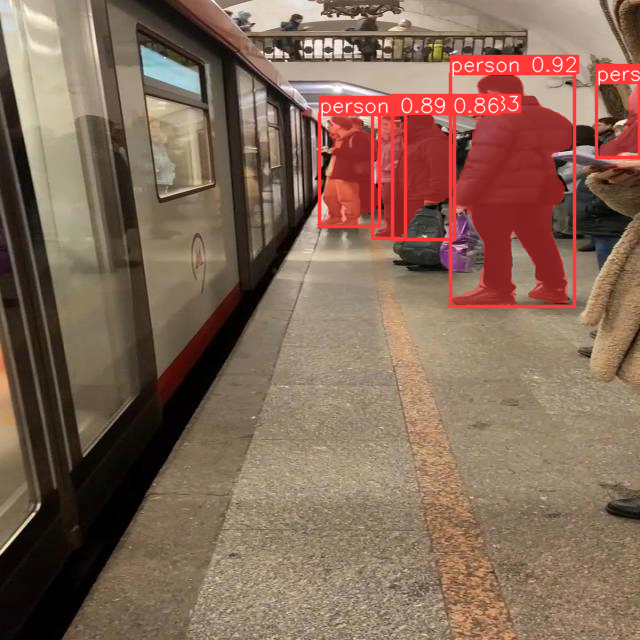

In [14]:
src = "/root/42028/Assignment3/yolo/data/test/images/-_MP4-0023_jpg.rf.1881b93a23abdfcb35c511f471ef84cd.jpg"

# Run inference
res = model.predict(source=src, conf=0.3, show_boxes=False)

# Visualize the results
for i, r in enumerate(res):
    # Plot results image
    im_bgr = r.plot()  # BGR-order numpy array
    im_rgb = Image.fromarray(im_bgr[..., ::-1])  # RGB-order PIL image

    # Show results to screen (in supported environments)
    r.show()

### 3. Retrain the model

---
Model Training

In [18]:
saved_model = YOLO(os.path.join(HISTORY_DIR, "train/weights/best.pt"))

In [ ]:
cfg_dir = os.path.join(CONFIG_DIR, "cfg1.yaml")

# Retrain the model with custom hyperparameters
results = saved_model.train(data=DATA_DIR, cfg=cfg_dir, epochs=150, imgsz=640, device=0, patience=50)

Ultralytics YOLOv8.2.20 🚀 Python-3.9.10 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 14931MiB)
engine/trainer: task=segment, mode=train, model=/root/42028/Assignment3/yolo/runs/segment/train/weights/best.pt, data=/root/42028/Assignment3/yolo/data/data.yaml, epochs=150, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_

/usr/local/lib/python3.9/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed ✅


train: Scanning /root/42028/Assignment3/yolo/data/train/labels.cache... 3423 images, 5 backgrounds, 0 corrupt: 100%|██████████| 3423/3423 [00:00<?, ?it/s]
val: Scanning /root/42028/Assignment3/yolo/data/valid/labels.cache... 885 images, 0 backgrounds, 0 corrupt: 100%|██████████| 885/885 [00:00<?, ?it/s]


Plotting labels to runs/segment/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 86 weight(decay=0.0), 97 weight(decay=0.0005), 96 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/segment/train2
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/150      8.46G      1.447      3.058      1.728      1.722         77        640: 100%|██████████| 214/214 [02:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:16<00:00,  1.71it/s]


                   all        885       2067      0.766      0.683      0.727      0.579      0.774      0.659      0.709      0.526

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/150      8.07G      1.206      2.307      1.302      1.482         57        640: 100%|██████████| 214/214 [02:07<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.80it/s]

                   all        885       2067      0.791      0.684      0.718      0.561      0.794      0.669      0.699      0.504



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/150       8.1G      1.175      2.248      1.265      1.458         67        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:16<00:00,  1.73it/s]


                   all        885       2067      0.773      0.638      0.694      0.539      0.768      0.631      0.678      0.504

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/150      8.46G      1.141       2.14      1.224      1.432         76        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all        885       2067      0.773      0.681      0.718      0.566      0.765      0.674      0.705      0.522



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/150      8.12G      1.119      2.078      1.187      1.419         60        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all        885       2067      0.783       0.66      0.721      0.554      0.767      0.652      0.705      0.521



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/150      8.36G      1.115      2.056       1.18      1.409         92        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.76it/s]

                   all        885       2067      0.721       0.64      0.678      0.519      0.711      0.631       0.66      0.478



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/150      8.15G       1.09      2.027      1.148      1.389         45        640: 100%|██████████| 214/214 [02:06<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all        885       2067      0.761      0.642      0.685      0.526       0.75      0.633      0.669       0.48



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/150      8.41G      1.075      2.006       1.12      1.381         65        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.78it/s]

                   all        885       2067      0.743      0.634      0.672      0.526      0.731      0.623      0.656       0.48



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/150      8.14G      1.036      1.933      1.072      1.348         60        640: 100%|██████████| 214/214 [02:06<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.78it/s]

                   all        885       2067      0.793      0.638      0.703      0.551      0.781      0.629      0.686      0.506



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/150       8.3G      1.036      1.927      1.068      1.347         39        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.78it/s]

                   all        885       2067      0.762      0.661      0.692      0.539      0.746       0.65      0.675      0.489



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/150      8.16G      1.031      1.913      1.068      1.346         74        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.80it/s]

                   all        885       2067       0.75      0.674      0.706      0.548      0.729      0.671      0.686      0.503



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/150      8.04G      1.019      1.887      1.055      1.346         73        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.82it/s]

                   all        885       2067      0.794      0.665      0.717      0.552      0.789      0.655      0.702      0.506



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/150      8.13G      1.024      1.873      1.064      1.347         62        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.80it/s]

                   all        885       2067      0.776      0.642      0.708      0.551      0.773      0.635      0.696      0.509



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/150      8.35G      1.001      1.837       1.03      1.323         75        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.81it/s]

                   all        885       2067      0.812      0.662      0.713      0.553      0.797      0.647      0.679        0.5



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/150      8.24G      1.004       1.81      1.027      1.329         62        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.80it/s]

                   all        885       2067      0.773      0.659      0.707      0.548      0.772      0.648      0.694      0.509



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/150      8.34G     0.9982      1.814      1.024      1.322         90        640: 100%|██████████| 214/214 [02:06<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.81it/s]

                   all        885       2067      0.761      0.653      0.683      0.539      0.746      0.642       0.66      0.491



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/150      8.07G     0.9887      1.821     0.9976      1.316         83        640: 100%|██████████| 214/214 [02:06<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.80it/s]

                   all        885       2067      0.798      0.663      0.716      0.565      0.792      0.659      0.699      0.515



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/150      8.35G     0.9778      1.764     0.9891      1.316         85        640: 100%|██████████| 214/214 [02:06<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.80it/s]

                   all        885       2067      0.786      0.658      0.705      0.544      0.788      0.646      0.684      0.502



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/150      8.12G     0.9865      1.816      1.002      1.318         49        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.80it/s]

                   all        885       2067      0.795      0.656      0.714      0.555      0.765      0.659      0.693      0.512



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/150      8.36G     0.9772      1.787     0.9894      1.312         50        640: 100%|██████████| 214/214 [02:06<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.80it/s]

                   all        885       2067      0.747      0.648      0.703      0.539      0.749      0.631      0.679      0.492



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/150      8.07G     0.9563       1.75     0.9803      1.297         85        640: 100%|██████████| 214/214 [02:06<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.81it/s]

                   all        885       2067      0.811      0.664      0.724      0.569      0.801      0.657      0.711      0.524



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/150      8.03G     0.9629      1.745     0.9707        1.3         65        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.81it/s]

                   all        885       2067      0.799      0.667      0.722      0.564      0.794      0.661      0.711      0.514



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/150      8.16G     0.9524      1.727     0.9666      1.296         63        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.80it/s]

                   all        885       2067      0.781      0.669      0.701       0.54      0.771      0.658      0.682      0.496



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/150      8.38G     0.9452      1.722     0.9445      1.286        100        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.80it/s]

                   all        885       2067      0.787      0.681       0.73      0.576      0.783       0.66       0.71      0.528



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/150      8.16G     0.9589      1.751     0.9717      1.295         93        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.81it/s]

                   all        885       2067        0.8      0.672      0.731      0.574      0.814      0.659      0.713      0.524



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/150      8.35G     0.9433      1.709     0.9441       1.28         59        640: 100%|██████████| 214/214 [02:06<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all        885       2067      0.807      0.662      0.724      0.571      0.797      0.654      0.703      0.525



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/150      8.16G     0.9464      1.721     0.9391      1.279        104        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all        885       2067      0.784      0.677      0.718      0.564      0.776      0.668      0.704      0.509



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/150      8.43G     0.9369      1.707     0.9229      1.277         62        640: 100%|██████████| 214/214 [02:06<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all        885       2067      0.805      0.622      0.697      0.549      0.806      0.612      0.683      0.505



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/150      8.14G     0.9298      1.704     0.9244      1.273         74        640: 100%|██████████| 214/214 [02:06<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.80it/s]

                   all        885       2067      0.821      0.668      0.731      0.577      0.811      0.661      0.717      0.516



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/150      8.07G     0.9161      1.682     0.8955       1.27         73        640: 100%|██████████| 214/214 [02:06<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.81it/s]

                   all        885       2067      0.785      0.693      0.737      0.575      0.775      0.682      0.723       0.52



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/150      8.09G      0.924      1.667     0.9084      1.265         71        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.81it/s]

                   all        885       2067      0.777      0.696      0.729       0.57      0.777      0.681      0.711       0.52



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/150      8.03G     0.9171      1.637      0.903      1.261         77        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.81it/s]

                   all        885       2067      0.808      0.684       0.74      0.581      0.805      0.681      0.726      0.533



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/150      8.15G     0.8979      1.634      0.872      1.249         64        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.81it/s]

                   all        885       2067      0.808      0.671      0.723      0.569      0.808      0.656      0.704      0.517



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/150       8.4G      0.908      1.646     0.8911      1.256         71        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.81it/s]

                   all        885       2067      0.811      0.686      0.741      0.583        0.8      0.681      0.725      0.531



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/150      8.12G     0.9035       1.65     0.8958      1.254         69        640: 100%|██████████| 214/214 [02:06<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.81it/s]

                   all        885       2067      0.804      0.686      0.743      0.589      0.793      0.679      0.727      0.535



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/150      8.38G     0.9008      1.644     0.8751      1.243         63        640: 100%|██████████| 214/214 [02:06<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.80it/s]

                   all        885       2067      0.782      0.708      0.738      0.585      0.781       0.69      0.722      0.525



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/150      8.13G     0.8898      1.598     0.8688      1.235         66        640: 100%|██████████| 214/214 [02:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.81it/s]

                   all        885       2067      0.816      0.684      0.743      0.587      0.837      0.666      0.727      0.533



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/150      8.32G      0.881       1.58      0.865      1.237         53        640: 100%|██████████| 214/214 [02:06<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.82it/s]

                   all        885       2067      0.762      0.699      0.724      0.576      0.756      0.688      0.702      0.515



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/150      8.15G     0.8996      1.613     0.8759      1.244         66        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.80it/s]

                   all        885       2067      0.808      0.685      0.743      0.593        0.8      0.679      0.721      0.536



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/150      8.51G     0.8879      1.615     0.8669      1.237         62        640: 100%|██████████| 214/214 [02:06<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.81it/s]

                   all        885       2067       0.81      0.691      0.738      0.579      0.799      0.685       0.72      0.525



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/150       8.2G      0.885      1.578     0.8461      1.234         58        640: 100%|██████████| 214/214 [02:06<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.80it/s]

                   all        885       2067      0.779      0.703      0.727      0.573      0.766      0.696      0.712      0.527



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/150      8.35G     0.8772      1.563     0.8462      1.229         73        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.82it/s]

                   all        885       2067      0.819      0.698       0.75      0.595      0.803      0.685      0.723      0.541



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/150      8.13G     0.8851      1.588     0.8623      1.241         83        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.81it/s]

                   all        885       2067      0.783      0.712      0.748      0.587      0.803      0.686       0.73      0.533



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/150      8.33G     0.8816      1.571     0.8464      1.235         77        640: 100%|██████████| 214/214 [02:06<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.81it/s]

                   all        885       2067      0.809      0.706      0.747      0.593      0.806      0.688       0.73      0.543



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/150      8.16G     0.8701      1.551       0.85      1.233         59        640: 100%|██████████| 214/214 [02:06<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.81it/s]

                   all        885       2067      0.806      0.696      0.738      0.587      0.795      0.686      0.722      0.535



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/150      8.03G     0.8641      1.569     0.8409      1.222         49        640: 100%|██████████| 214/214 [02:06<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.81it/s]

                   all        885       2067      0.809      0.691      0.743      0.594      0.816      0.679      0.723      0.542



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/150      8.13G     0.8655      1.546     0.8407      1.223         88        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.82it/s]

                   all        885       2067       0.81       0.67      0.735      0.593      0.798      0.663      0.713      0.537



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/150      8.37G     0.8606      1.554     0.8287      1.222         58        640: 100%|██████████| 214/214 [02:06<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.81it/s]

                   all        885       2067        0.8      0.692      0.739      0.585      0.801      0.686      0.726      0.541



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/150      8.07G     0.8769      1.574     0.8345      1.228         62        640: 100%|██████████| 214/214 [02:06<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.82it/s]

                   all        885       2067      0.781      0.697      0.742      0.593      0.777      0.683      0.721      0.537



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/150      8.37G     0.8753      1.581     0.8459      1.232         67        640: 100%|██████████| 214/214 [02:06<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.81it/s]

                   all        885       2067      0.798      0.709      0.746      0.589      0.795      0.702      0.727      0.538



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/150       8.1G     0.8598       1.55     0.8265       1.22         74        640: 100%|██████████| 214/214 [02:06<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.82it/s]

                   all        885       2067      0.793      0.698       0.74      0.594      0.785      0.693      0.726      0.536



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/150      8.32G     0.8601      1.547     0.8322      1.213         56        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.81it/s]

                   all        885       2067      0.787      0.718      0.752      0.595      0.782      0.711      0.737      0.539



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/150      8.15G     0.8376      1.489     0.8053      1.208         59        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.81it/s]

                   all        885       2067       0.82       0.69      0.748      0.596      0.812      0.685      0.735      0.541



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/150      8.03G     0.8432      1.499     0.8019      1.214         64        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.81it/s]

                   all        885       2067      0.808      0.694      0.744      0.595        0.8      0.685      0.731       0.54



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/150      8.17G     0.8463      1.506     0.7981      1.201         55        640: 100%|██████████| 214/214 [02:06<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.80it/s]

                   all        885       2067       0.79        0.7      0.745      0.592       0.77      0.687      0.722      0.534



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/150      8.38G     0.8422      1.523     0.8071      1.205         55        640: 100%|██████████| 214/214 [02:06<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.82it/s]

                   all        885       2067      0.791      0.707      0.755      0.599      0.791      0.696      0.736      0.547



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/150      8.13G     0.8388      1.514     0.8034      1.206         68        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.81it/s]

                   all        885       2067      0.799      0.719      0.752      0.601      0.815      0.676      0.729      0.547



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/150       8.4G     0.8304      1.482     0.7898      1.199         65        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.80it/s]

                   all        885       2067      0.792      0.696      0.744      0.595      0.801      0.673      0.721      0.537



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/150      8.16G     0.8351      1.485     0.7997      1.203         58        640: 100%|██████████| 214/214 [02:06<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.81it/s]

                   all        885       2067      0.808      0.698      0.749        0.6      0.799      0.685      0.734      0.548



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/150      8.37G     0.8171       1.46     0.7804      1.192         78        640: 100%|██████████| 214/214 [02:06<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.80it/s]

                   all        885       2067      0.791      0.708      0.749      0.591      0.782      0.694      0.728      0.538



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/150      8.13G     0.8165      1.449     0.7772      1.197         68        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.81it/s]

                   all        885       2067      0.789      0.717      0.761      0.613      0.792      0.705      0.744      0.556



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/150       8.3G     0.8327        1.5     0.7867      1.198         80        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.81it/s]

                   all        885       2067      0.804      0.721      0.759      0.603      0.792      0.719      0.741      0.548



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/150       8.2G     0.8098       1.44     0.7632      1.185         81        640: 100%|██████████| 214/214 [02:06<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.81it/s]

                   all        885       2067       0.81      0.716       0.76      0.611       0.81      0.707      0.747      0.557



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/150      8.33G     0.8239      1.475     0.7811      1.192         51        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.81it/s]

                   all        885       2067      0.818      0.714      0.762      0.609      0.819      0.701      0.748      0.561



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/150      8.18G     0.8207      1.458     0.7776      1.191         57        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.82it/s]

                   all        885       2067      0.846      0.707      0.762      0.605      0.835      0.689      0.743      0.554



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/150      8.37G     0.8202      1.469     0.7823      1.186         60        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.81it/s]

                   all        885       2067      0.807      0.713      0.765      0.612      0.801      0.701      0.744      0.557



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/150      8.21G     0.8287      1.493      0.792      1.197         66        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.81it/s]

                   all        885       2067      0.805      0.728      0.765      0.614      0.795      0.705      0.744      0.556



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/150       8.3G       0.82      1.428     0.7603      1.195         67        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.82it/s]

                   all        885       2067      0.795      0.725      0.754       0.61        0.8        0.7      0.735      0.552



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/150      8.09G     0.8082      1.438     0.7635      1.182         86        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.82it/s]

                   all        885       2067      0.817      0.727      0.765      0.612      0.807      0.711      0.748      0.558



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/150      8.34G     0.8022      1.416     0.7465      1.179         81        640: 100%|██████████| 214/214 [02:06<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.82it/s]

                   all        885       2067      0.799      0.732      0.762       0.61       0.79       0.72      0.746       0.56



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/150       8.1G     0.7995      1.413     0.7494      1.179         65        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.81it/s]

                   all        885       2067      0.834      0.716       0.77      0.623      0.834      0.704      0.752      0.567



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/150      8.37G     0.8095      1.413     0.7553      1.185         52        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.82it/s]

                   all        885       2067      0.801      0.722      0.755      0.608      0.795      0.703      0.737      0.555



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/150      8.09G     0.8023      1.434     0.7457      1.175         55        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.82it/s]

                   all        885       2067      0.827      0.715       0.76      0.617       0.81      0.702      0.738      0.553



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/150       8.1G     0.7967      1.393     0.7335      1.172         96        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.81it/s]

                   all        885       2067      0.807      0.732      0.774      0.618      0.799      0.721      0.753      0.563



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/150      8.15G     0.7975      1.413     0.7339      1.176         50        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.82it/s]

                   all        885       2067      0.817      0.718      0.762      0.612      0.801      0.702      0.738      0.554



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/150      8.35G     0.7941      1.405     0.7331       1.17         48        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.81it/s]

                   all        885       2067      0.797      0.733      0.762      0.614      0.798      0.717      0.747      0.559



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/150      8.12G     0.8002      1.396       0.74      1.178         72        640: 100%|██████████| 214/214 [02:06<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.82it/s]

                   all        885       2067      0.825      0.705      0.765       0.62      0.829       0.69      0.743      0.561



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/150      8.12G     0.7928      1.403     0.7387      1.173         67        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.82it/s]

                   all        885       2067      0.805      0.725      0.766      0.618      0.803      0.706       0.75      0.564



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/150      8.14G     0.7919       1.41     0.7453      1.178         66        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.81it/s]

                   all        885       2067      0.823      0.729      0.768       0.62      0.796      0.718      0.749      0.565



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/150      8.32G     0.7861      1.381     0.7289      1.169         64        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.82it/s]

                   all        885       2067      0.834      0.718       0.76      0.617      0.815      0.704      0.742      0.563



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/150      8.09G     0.7911        1.4     0.7352      1.175         65        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.81it/s]

                   all        885       2067      0.824      0.714      0.766      0.619      0.812      0.706      0.745      0.563



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/150      8.39G     0.7755      1.357     0.7173      1.163         91        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.81it/s]

                   all        885       2067      0.815      0.712      0.765      0.618      0.804      0.702      0.746      0.567



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/150      8.14G     0.7794      1.355     0.7315      1.162         74        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.81it/s]

                   all        885       2067      0.816      0.724      0.764       0.62        0.8      0.709      0.746      0.568



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/150      8.37G     0.7864      1.398     0.7249      1.153         66        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.81it/s]

                   all        885       2067      0.822      0.727      0.765      0.619      0.817       0.71      0.746      0.566



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/150      8.17G      0.775      1.373     0.7147      1.151         79        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.82it/s]

                   all        885       2067      0.813       0.73      0.771      0.623      0.791      0.724      0.754      0.568



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/150      8.37G      0.774      1.384     0.7189      1.158         89        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.82it/s]

                   all        885       2067      0.826      0.722      0.766      0.619      0.812      0.711       0.75      0.563



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/150      8.18G     0.7793      1.393     0.7217      1.163         58        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.81it/s]

                   all        885       2067      0.822      0.721      0.764      0.621      0.813      0.715      0.749      0.562



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/150      8.04G     0.7762      1.376     0.7109       1.16         70        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.82it/s]

                   all        885       2067      0.817      0.726      0.761      0.621       0.81      0.717      0.749      0.564



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/150      8.16G     0.7686      1.371     0.7053      1.148         61        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.82it/s]

                   all        885       2067       0.81      0.727      0.764      0.621      0.817      0.712      0.744      0.563



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/150      8.33G     0.7779      1.385     0.7171      1.155         54        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.81it/s]

                   all        885       2067      0.818      0.714      0.756      0.617      0.809      0.706      0.741      0.559



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/150      8.13G     0.7701      1.343     0.7028      1.152         58        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.82it/s]

                   all        885       2067      0.831      0.716      0.764       0.62      0.795      0.723      0.748      0.565



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/150      8.36G     0.7594      1.352      0.695      1.147         60        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.81it/s]

                   all        885       2067      0.819      0.715      0.761      0.617        0.8       0.71      0.749       0.56



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/150       8.2G     0.7756       1.34     0.7052      1.151         72        640: 100%|██████████| 214/214 [02:06<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.81it/s]

                   all        885       2067      0.827      0.714      0.764       0.62      0.779      0.728      0.753      0.566



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/150      8.41G     0.7607       1.35      0.697      1.151         55        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.82it/s]

                   all        885       2067      0.834      0.723      0.761      0.617      0.818       0.71      0.745      0.567



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/150      8.09G     0.7677       1.35     0.7058      1.152         69        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.81it/s]

                   all        885       2067      0.822      0.725      0.763      0.622      0.803      0.724      0.746      0.564



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/150      8.39G     0.7558      1.335     0.6901      1.149         52        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.81it/s]

                   all        885       2067      0.831      0.737      0.769      0.624      0.818      0.729       0.75      0.569



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/150      8.22G     0.7574      1.329     0.6922      1.145         68        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.81it/s]

                   all        885       2067      0.834      0.742      0.778       0.63      0.824      0.733      0.759      0.574



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/150      8.31G      0.764      1.369     0.7066       1.15         75        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.81it/s]

                   all        885       2067      0.827      0.734      0.773      0.626      0.819      0.726      0.754      0.571



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/150      8.13G     0.7561      1.319     0.6834      1.145         75        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.82it/s]

                   all        885       2067      0.823      0.728      0.771      0.623      0.812      0.721      0.752       0.57



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/150      8.38G     0.7549      1.299     0.6771       1.14         49        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.81it/s]

                   all        885       2067      0.816      0.738      0.771       0.62      0.808       0.73       0.75      0.564



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    101/150      8.16G     0.7382      1.319     0.6714      1.134         67        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.81it/s]

                   all        885       2067      0.848      0.719      0.772      0.626      0.831      0.708      0.754       0.57



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    102/150      8.33G     0.7415      1.304     0.6787      1.135         58        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.82it/s]

                   all        885       2067      0.821      0.727      0.773      0.627      0.808       0.72      0.751      0.573



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    103/150      8.05G     0.7544      1.313     0.6859      1.147         63        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.82it/s]

                   all        885       2067      0.832      0.724      0.773      0.631      0.797      0.722      0.751      0.577



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    104/150      8.27G     0.7372       1.29     0.6761      1.136         71        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.81it/s]

                   all        885       2067      0.819      0.726       0.77      0.628      0.806      0.717      0.752      0.576



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    105/150      8.15G     0.7403      1.317      0.677      1.137         62        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.82it/s]

                   all        885       2067      0.837      0.718      0.774       0.63      0.822      0.711      0.758      0.574



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    106/150      8.32G     0.7421      1.296      0.686      1.139         61        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.81it/s]

                   all        885       2067      0.824      0.734      0.774      0.635       0.81      0.721      0.754      0.576



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    107/150      8.09G     0.7425      1.287     0.6689      1.138         95        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.81it/s]

                   all        885       2067      0.845      0.725      0.773      0.632      0.833      0.714      0.753      0.577



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    108/150      8.06G     0.7424      1.282     0.6676      1.131         69        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.81it/s]

                   all        885       2067      0.836      0.725      0.775      0.631      0.816      0.711      0.753      0.577



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    109/150      8.12G     0.7394      1.272     0.6618      1.133         78        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.81it/s]

                   all        885       2067      0.828      0.733      0.771      0.627      0.817       0.72      0.753      0.574



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    110/150      8.34G     0.7427       1.31     0.6742      1.136         55        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.81it/s]

                   all        885       2067      0.833      0.736      0.778      0.633      0.811      0.725      0.759       0.58



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    111/150      8.12G     0.7258      1.264     0.6502      1.123         85        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.82it/s]

                   all        885       2067      0.844      0.734      0.776      0.635       0.83      0.726      0.758      0.578



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    112/150      8.07G     0.7259      1.252     0.6508      1.125         42        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.82it/s]

                   all        885       2067      0.836      0.733      0.775      0.631      0.822      0.726      0.758      0.578



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    113/150      8.11G     0.7301      1.262     0.6564       1.13         61        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.81it/s]

                   all        885       2067       0.83      0.735      0.777      0.633      0.815      0.725      0.756       0.58



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    114/150      8.35G     0.7387      1.309     0.6594      1.128         65        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.82it/s]

                   all        885       2067      0.831      0.735      0.776      0.633      0.816      0.724      0.756      0.576



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    115/150      8.12G     0.7263      1.253     0.6436      1.125         81        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.81it/s]

                   all        885       2067      0.826      0.735      0.775       0.63      0.809      0.728      0.755      0.578



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    116/150      8.39G     0.7202      1.268     0.6507      1.122         51        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.82it/s]

                   all        885       2067      0.847       0.72      0.776      0.633      0.832      0.708      0.753      0.575



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    117/150      8.27G     0.7161      1.252     0.6454      1.114         55        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.81it/s]

                   all        885       2067      0.825      0.733      0.771      0.631      0.815      0.719      0.752      0.575



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    118/150      8.28G      0.727      1.263     0.6505      1.124         87        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.81it/s]

                   all        885       2067       0.82      0.732      0.775      0.637      0.815      0.724      0.756      0.579



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    119/150      8.16G     0.7217       1.25     0.6438      1.118         57        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.82it/s]

                   all        885       2067      0.824      0.733      0.775      0.635      0.813      0.724      0.756       0.58



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    120/150       8.4G     0.7273       1.27     0.6414      1.123         59        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.82it/s]

                   all        885       2067      0.842      0.731      0.775      0.638      0.833      0.717      0.754       0.58



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    121/150      8.16G     0.7118      1.227     0.6355       1.11         62        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.82it/s]

                   all        885       2067      0.844      0.724      0.776      0.638      0.832      0.711      0.755      0.579



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    122/150      8.32G     0.7158      1.245     0.6423      1.118         50        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.81it/s]

                   all        885       2067      0.838      0.729      0.777      0.638      0.836      0.715      0.755      0.579



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    123/150      8.23G     0.7221      1.261      0.641      1.118         97        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.81it/s]

                   all        885       2067      0.826       0.74      0.777      0.637      0.811      0.726      0.758      0.583



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    124/150      8.11G     0.7097      1.215     0.6291      1.109         74        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.81it/s]

                   all        885       2067      0.851      0.717      0.777      0.637      0.838      0.706      0.759      0.583



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    125/150      8.17G     0.7217      1.233     0.6385      1.115         60        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.82it/s]

                   all        885       2067      0.814      0.743      0.776      0.634      0.805       0.73       0.76       0.58



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    126/150      8.32G     0.7133      1.243     0.6322      1.111         63        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.82it/s]

                   all        885       2067      0.823      0.736      0.777      0.637      0.808      0.727      0.755      0.581



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    127/150      8.13G     0.6922      1.213     0.6249      1.102         35        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.81it/s]

                   all        885       2067      0.792      0.768      0.778      0.636      0.776      0.746      0.758      0.585



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    128/150      8.37G     0.7129      1.246     0.6288      1.108         56        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.82it/s]

                   all        885       2067       0.84      0.731      0.778      0.636      0.819       0.72      0.759      0.583



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    129/150      8.12G     0.7117      1.234     0.6254      1.108         74        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.82it/s]

                   all        885       2067      0.819      0.744      0.782      0.638      0.793      0.745      0.759      0.585



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    130/150      8.41G     0.6902      1.195     0.6049      1.098         76        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.81it/s]

                   all        885       2067      0.822      0.749      0.782      0.638      0.807      0.737      0.758      0.588



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    131/150      8.13G     0.7122      1.242     0.6356      1.116         61        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.82it/s]

                   all        885       2067      0.818      0.746      0.779      0.639      0.807      0.738       0.76      0.588



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    132/150      8.36G     0.7096      1.229     0.6288      1.115         57        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.81it/s]

                   all        885       2067      0.813       0.75      0.782      0.639      0.805      0.742      0.762      0.587



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    133/150      8.12G      0.699      1.198      0.612        1.1         85        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.82it/s]

                   all        885       2067      0.817      0.747      0.776      0.637      0.804      0.735      0.757      0.587



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    134/150      8.43G     0.7056      1.237     0.6256      1.109         86        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.81it/s]

                   all        885       2067      0.834      0.741       0.78      0.636       0.82       0.73      0.758      0.585



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    135/150      8.13G     0.7008      1.223     0.6182      1.101         75        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.82it/s]

                   all        885       2067      0.831      0.746      0.782      0.638       0.82      0.738      0.762      0.586



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    136/150      8.39G     0.6948      1.205     0.6148      1.105         82        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.82it/s]

                   all        885       2067      0.828      0.749      0.783      0.641      0.817       0.74      0.763      0.588



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    137/150      8.11G     0.7147       1.24     0.6309      1.109         77        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.81it/s]

                   all        885       2067      0.828      0.742      0.783      0.638      0.815       0.73      0.761      0.587



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    138/150      8.35G     0.6993      1.213     0.6182      1.101         61        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.82it/s]

                   all        885       2067      0.817      0.752      0.784      0.639      0.804      0.739       0.76      0.589



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    139/150       8.1G     0.6735      1.173     0.5912      1.091         72        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.81it/s]

                   all        885       2067      0.814      0.755      0.784      0.639      0.803       0.74      0.762       0.59



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    140/150      8.33G      0.706      1.234     0.6225      1.102         85        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.82it/s]

                   all        885       2067      0.823      0.745      0.782      0.638      0.809      0.733      0.762      0.589


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    141/150      8.06G      0.586     0.8884     0.4545      1.023         28        640:  58%|█████▊    | 124/214 [01:13<00:52,  1.71it/s]

---
Resume Training

In [8]:
model = YOLO(os.path.join(HISTORY_DIR, "train2/weights/last.pt"))

In [10]:
results = model.train(resume=True)

Ultralytics YOLOv8.2.20 🚀 Python-3.9.10 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 14931MiB)
engine/trainer: task=segment, mode=train, model=/root/42028/Assignment3/yolo/runs/segment/train2/weights/last.pt, data=/root/42028/Assignment3/yolo/data/data.yaml, epochs=150, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=/root/42028/Assignment3/yolo/runs/segment/train2/weights/last.pt, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embe

/usr/local/lib/python3.9/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed ✅


train: Scanning /root/42028/Assignment3/yolo/data/train/labels.cache... 3423 images, 5 backgrounds, 0 corrupt: 100%|██████████| 3423/3423 [00:00<?, ?it/s]
val: Scanning /root/42028/Assignment3/yolo/data/valid/labels.cache... 885 images, 0 backgrounds, 0 corrupt: 100%|██████████| 885/885 [00:00<?, ?it/s]


Plotting labels to runs/segment/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 86 weight(decay=0.0), 97 weight(decay=0.0005), 96 bias(decay=0.0)
Resuming training /root/42028/Assignment3/yolo/runs/segment/train2/weights/last.pt from epoch 147 to 150 total epochs
Closing dataloader mosaic
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/segment/train2
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    147/150      8.48G     0.5732     0.8663     0.4313      1.018         38        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.76it/s]

                   all        885       2067      0.827      0.753      0.788      0.647      0.818      0.737      0.768      0.599



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    148/150       7.9G      0.568     0.8524      0.424      1.017         39        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all        885       2067      0.822       0.76      0.788      0.647      0.813      0.749      0.771        0.6



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    149/150      7.91G     0.5617     0.8597      0.425       1.01         37        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.80it/s]

                   all        885       2067      0.822      0.755      0.789      0.649      0.812      0.746      0.772        0.6



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    150/150      7.93G     0.5769     0.8667     0.4254      1.015         37        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all        885       2067      0.823       0.76      0.791      0.649      0.812      0.747      0.772        0.6



4 epochs completed in 0.163 hours.
Optimizer stripped from runs/segment/train2/weights/last.pt, 54.8MB
Optimizer stripped from runs/segment/train2/weights/best.pt, 54.8MB

Validating runs/segment/train2/weights/best.pt...
Ultralytics YOLOv8.2.20 🚀 Python-3.9.10 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 14931MiB)
YOLOv8m-seg summary (fused): 245 layers, 27223542 parameters, 0 gradients, 110.0 GFLOPs


/usr/local/lib/python3.9/site-packages/torch/nn/modules/conv.py:952: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv_transpose2d(
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:17<00:00,  1.58it/s]


                   all        885       2067      0.823       0.76       0.79      0.649      0.812      0.748      0.772        0.6
                person        885        464      0.703      0.597      0.624      0.422      0.682      0.577      0.593      0.356
            rail-track        885       1603      0.944      0.922      0.957      0.877      0.942       0.92      0.951      0.845
Speed: 0.3ms preprocess, 11.4ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/segment/train2


---
Model Validation

In [18]:
model = YOLO(os.path.join(HISTORY_DIR, "train2/weights/best.pt"))

In [12]:
metrics = model.val()
metrics.box.map
metrics.box.map50
metrics.box.map75
metrics.box.maps
metrics.seg.map
metrics.seg.map50
metrics.seg.map75
metrics.seg.maps

Ultralytics YOLOv8.2.20 🚀 Python-3.9.10 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 14931MiB)
YOLOv8m-seg summary (fused): 245 layers, 27223542 parameters, 0 gradients, 110.0 GFLOPs


val: Scanning /root/42028/Assignment3/yolo/data/valid/labels.cache... 885 images, 0 backgrounds, 0 corrupt: 100%|██████████| 885/885 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/56 [00:00<?, ?it/s]/usr/local/lib/python3.9/site-packages/torch/nn/modules/conv.py:952: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv_transpose2d(
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:30<00:00,  1.83it/s]


                   all        885       2067       0.82      0.758       0.79      0.649      0.809      0.747      0.769      0.598
                person        885        464      0.698      0.595      0.622      0.422      0.676      0.575      0.588      0.353
            rail-track        885       1603      0.943      0.922      0.958      0.876      0.942       0.92      0.951      0.843
Speed: 0.4ms preprocess, 26.3ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/segment/val2


array([    0.35268,     0.84276])

In [19]:
test_dir = os.path.join(CONFIG_DIR, "test.yaml")

metrics = model.val(data=test_dir, device=0)
metrics.box.map
metrics.box.map50
metrics.box.map75
metrics.box.maps
metrics.seg.map
metrics.seg.map50
metrics.seg.map75
metrics.seg.maps

Ultralytics YOLOv8.2.22 🚀 Python-3.9.10 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 14931MiB)
YOLOv8m-seg summary (fused): 245 layers, 27223542 parameters, 0 gradients, 110.0 GFLOPs


val: Scanning /root/42028/Assignment3/yolo/data/test/labels.cache... 189 images, 1 backgrounds, 0 corrupt: 100%|██████████| 189/189 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:08<00:00,  1.46it/s]


                   all        189        598      0.791      0.675      0.731      0.574      0.756      0.709      0.721      0.538
                person        189        210      0.655      0.559      0.587      0.405      0.596      0.614      0.582      0.364
            rail-track        189        388      0.927       0.79      0.876      0.744      0.917      0.804       0.86      0.712
Speed: 1.5ms preprocess, 24.4ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to runs/segment/val5


array([    0.36355,     0.71238])

---
Model Prediction


image 1/1 /root/42028/Assignment3/yolo/data/train/images/Ekran-goruntusu-2024-01-04-103319_jpg.rf.1a26a2d3019d14dde4a13aeffd749555.jpg: 640x640 9 persons, 2 rail-tracks, 45.7ms
Speed: 1.6ms preprocess, 45.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


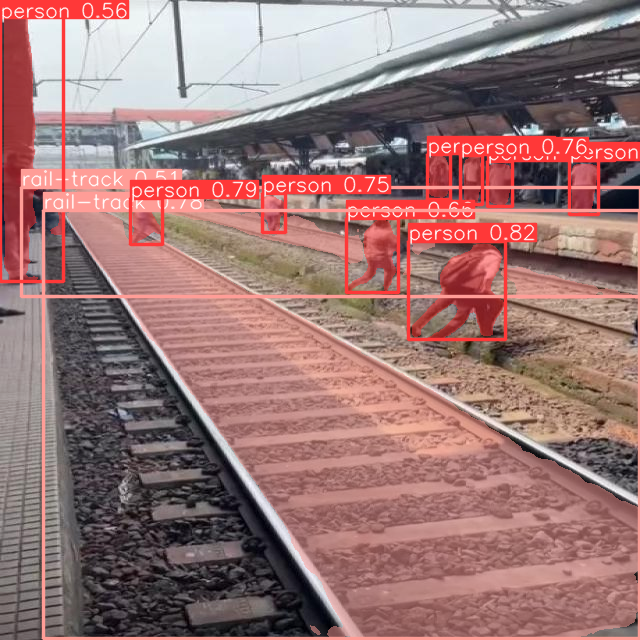

In [12]:
src = "/root/42028/Assignment3/yolo/data/train/images/Ekran-goruntusu-2024-01-04-103319_jpg.rf.1a26a2d3019d14dde4a13aeffd749555.jpg"

# Run inference
res = model.predict(source=src, conf=0.3, show_boxes=False)

# Visualize the results
for i, r in enumerate(res):
    # Plot results image
    im_bgr = r.plot()  # BGR-order numpy array
    im_rgb = Image.fromarray(im_bgr[..., ::-1])  # RGB-order PIL image

    # Show results to screen (in supported environments)
    r.show()

### 4. Retrain the model

---
Model Training

In [14]:
saved_model = YOLO(os.path.join(HISTORY_DIR, "train2/weights/best.pt"))

In [15]:
cfg_dir = os.path.join(CONFIG_DIR, "cfg2.yaml")

# Retrain the model with custom hyperparameters
results = saved_model.train(data=DATA_DIR, cfg=cfg_dir, epochs=150, imgsz=640, device=0)

Ultralytics YOLOv8.2.20 🚀 Python-3.9.10 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 14931MiB)
engine/trainer: task=segment, mode=train, model=/root/42028/Assignment3/yolo/runs/segment/train2/weights/best.pt, data=/root/42028/Assignment3/yolo/data/data.yaml, epochs=150, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, sav

/usr/local/lib/python3.9/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed ✅


train: Scanning /root/42028/Assignment3/yolo/data/train/labels.cache... 3423 images, 5 backgrounds, 0 corrupt: 100%|██████████| 3423/3423 [00:00<?, ?it/s]
val: Scanning /root/42028/Assignment3/yolo/data/valid/labels.cache... 885 images, 0 backgrounds, 0 corrupt: 100%|██████████| 885/885 [00:00<?, ?it/s]


Plotting labels to runs/segment/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 86 weight(decay=0.0), 97 weight(decay=0.0005), 96 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/segment/train3
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/150      8.52G      1.141      1.915      1.312      1.419        100        640: 100%|██████████| 214/214 [02:16<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.77it/s]

                   all        885       2067      0.807      0.744      0.771      0.621      0.808      0.724       0.75      0.579



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/150      8.22G      1.101      1.814      1.233      1.389        157        640: 100%|██████████| 214/214 [02:11<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all        885       2067      0.813      0.725      0.755      0.603      0.798      0.712      0.735      0.559



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/150      8.16G      1.115       1.85      1.251      1.395         96        640: 100%|██████████| 214/214 [02:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all        885       2067      0.794        0.7      0.733      0.585      0.783      0.689      0.717      0.544



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/150      8.41G      1.142      1.872      1.291      1.421        109        640: 100%|██████████| 214/214 [02:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.76it/s]

                   all        885       2067      0.817       0.68      0.738      0.586      0.823      0.662      0.717      0.533



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/150      8.19G      1.128      1.861      1.277       1.41         88        640: 100%|██████████| 214/214 [02:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.78it/s]

                   all        885       2067      0.803      0.688      0.737      0.589      0.793      0.673      0.711      0.533



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/150       8.2G       1.12      1.844      1.254        1.4        114        640: 100%|██████████| 214/214 [02:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.76it/s]

                   all        885       2067      0.816      0.688       0.73      0.577        0.8      0.678      0.711      0.533



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/150      8.24G      1.135      1.841      1.279      1.406         84        640: 100%|██████████| 214/214 [02:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all        885       2067      0.794      0.698      0.742      0.592       0.79      0.686      0.721      0.538



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/150      8.46G      1.132      1.876      1.266      1.407        106        640: 100%|██████████| 214/214 [02:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.77it/s]

                   all        885       2067      0.774      0.682      0.718      0.572      0.757      0.662      0.692      0.514



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/150      8.28G      1.118      1.831      1.249      1.399         87        640: 100%|██████████| 214/214 [02:10<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.78it/s]

                   all        885       2067      0.819      0.673      0.729      0.588      0.795      0.665      0.705      0.534



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/150      8.46G      1.105      1.821      1.239      1.386         81        640: 100%|██████████| 214/214 [02:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.78it/s]

                   all        885       2067      0.803      0.684       0.73      0.584      0.766      0.684      0.706      0.532



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/150       8.2G      1.103      1.818       1.23      1.382        107        640: 100%|██████████| 214/214 [02:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.78it/s]

                   all        885       2067      0.785       0.68      0.733      0.576      0.786       0.68      0.717      0.533



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/150      8.15G      1.091      1.757      1.225      1.375        111        640: 100%|██████████| 214/214 [02:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.77it/s]

                   all        885       2067      0.814      0.669      0.726      0.575      0.792      0.658      0.701      0.533



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/150      8.21G      1.093      1.803      1.218      1.373        135        640: 100%|██████████| 214/214 [02:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.78it/s]

                   all        885       2067      0.768      0.695      0.733      0.586      0.765      0.685      0.712      0.538



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/150      8.54G      1.104      1.818      1.223      1.383         92        640: 100%|██████████| 214/214 [02:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.82it/s]

                   all        885       2067      0.783      0.708      0.742      0.586      0.771      0.697      0.718      0.537



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/150      8.24G       1.08      1.785      1.212      1.371         93        640: 100%|██████████| 214/214 [02:10<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all        885       2067      0.806      0.684      0.723      0.571      0.789      0.677      0.708      0.535



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/150      8.13G      1.071      1.748      1.204      1.371         86        640: 100%|██████████| 214/214 [02:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.78it/s]

                   all        885       2067        0.8      0.694      0.736      0.581      0.791      0.687      0.715      0.529



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/150      8.24G      1.074      1.765      1.202      1.365         83        640: 100%|██████████| 214/214 [02:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.78it/s]

                   all        885       2067      0.789      0.679      0.724      0.586      0.789      0.668      0.705      0.536



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/150      8.05G      1.084      1.759      1.199      1.375         96        640: 100%|██████████| 214/214 [02:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.78it/s]

                   all        885       2067      0.788      0.694       0.73      0.586      0.786      0.687      0.714      0.531



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/150      8.28G       1.06      1.732      1.189      1.358         86        640: 100%|██████████| 214/214 [02:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all        885       2067      0.806      0.697      0.749      0.595      0.796      0.692      0.733       0.54



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/150      8.15G       1.08      1.782      1.196      1.369        106        640: 100%|██████████| 214/214 [02:11<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all        885       2067      0.807      0.681       0.73      0.586        0.8      0.667       0.71       0.53



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/150      8.24G      1.057      1.776      1.175      1.355        159        640: 100%|██████████| 214/214 [02:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.78it/s]

                   all        885       2067      0.804      0.699      0.737      0.575      0.792      0.691      0.722      0.532



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/150      8.11G      1.062      1.723      1.191      1.354        102        640: 100%|██████████| 214/214 [02:09<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.78it/s]

                   all        885       2067      0.773      0.703      0.737       0.59       0.78      0.684      0.723       0.54



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/150      8.26G      1.063      1.738      1.177      1.355        110        640: 100%|██████████| 214/214 [02:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all        885       2067      0.825      0.673      0.742       0.59      0.827      0.667      0.728      0.545



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/150      8.43G      1.057      1.728      1.176      1.358        155        640: 100%|██████████| 214/214 [02:10<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all        885       2067      0.806      0.695      0.739      0.584      0.794      0.685      0.719      0.536



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/150      8.22G      1.046      1.753      1.168      1.348        105        640: 100%|██████████| 214/214 [02:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all        885       2067      0.787      0.691      0.728       0.58      0.763      0.673      0.701      0.525



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/150      8.47G      1.047      1.707      1.167       1.35         86        640: 100%|██████████| 214/214 [02:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.78it/s]

                   all        885       2067      0.802      0.699      0.739      0.583      0.784      0.681      0.716      0.538



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/150       8.2G      1.058      1.734      1.186      1.351         96        640: 100%|██████████| 214/214 [02:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.78it/s]

                   all        885       2067      0.808      0.706      0.752        0.6      0.797      0.694      0.725       0.54



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/150      8.11G      1.038      1.689      1.147      1.339         80        640: 100%|██████████| 214/214 [02:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.78it/s]

                   all        885       2067      0.799      0.694      0.741      0.588      0.785      0.672      0.709      0.535



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/150       8.2G      1.038      1.724      1.157      1.338         89        640: 100%|██████████| 214/214 [02:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.78it/s]

                   all        885       2067      0.823      0.677      0.728      0.577       0.81      0.673      0.709      0.526



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/150      8.38G      1.034      1.704      1.139       1.34        103        640: 100%|██████████| 214/214 [02:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all        885       2067      0.785      0.707      0.739      0.587      0.792      0.682      0.714      0.536



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/150      8.24G      1.034      1.676       1.14      1.336        108        640: 100%|██████████| 214/214 [02:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all        885       2067      0.836      0.683      0.739      0.594      0.814      0.684      0.723      0.538



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/150      8.48G      1.038       1.71      1.144      1.333         97        640: 100%|██████████| 214/214 [02:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all        885       2067      0.783      0.717      0.749      0.597      0.794      0.684      0.728      0.542



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/150      8.26G      1.038      1.722       1.16      1.332        105        640: 100%|██████████| 214/214 [02:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all        885       2067      0.779      0.699      0.739      0.588      0.768      0.686      0.723      0.538



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/150      8.42G      1.046      1.724      1.162      1.338         93        640: 100%|██████████| 214/214 [02:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.80it/s]

                   all        885       2067       0.84      0.689      0.749        0.6      0.833      0.688      0.733      0.543



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/150      8.22G       1.02      1.693      1.124      1.323         99        640: 100%|██████████| 214/214 [02:10<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all        885       2067      0.797      0.721      0.751      0.595      0.785      0.711      0.731      0.542



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/150      8.07G      1.027      1.689      1.144      1.333        116        640: 100%|██████████| 214/214 [02:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all        885       2067      0.805       0.69      0.743       0.59      0.795      0.683      0.724      0.541



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/150      8.27G      1.024      1.694      1.126      1.329        121        640: 100%|██████████| 214/214 [02:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.80it/s]

                   all        885       2067       0.79      0.682      0.731      0.587      0.791      0.671      0.712      0.538



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/150      8.46G      1.015      1.681      1.126      1.322         57        640: 100%|██████████| 214/214 [02:09<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all        885       2067      0.797      0.698      0.743      0.591      0.791      0.695      0.729      0.538



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/150      8.15G       1.02      1.669      1.127      1.327         69        640: 100%|██████████| 214/214 [02:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all        885       2067      0.811      0.675      0.731      0.587      0.806      0.671      0.712      0.534



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/150      8.39G      1.021      1.669      1.142      1.338         83        640: 100%|██████████| 214/214 [02:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all        885       2067      0.798      0.689      0.738      0.592      0.795      0.681      0.719      0.543



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/150      8.22G      1.033      1.696      1.143      1.335         81        640: 100%|██████████| 214/214 [02:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all        885       2067      0.785      0.723      0.756      0.605      0.773       0.71       0.73      0.554



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/150      8.46G      1.017      1.697       1.12      1.318        104        640: 100%|██████████| 214/214 [02:09<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all        885       2067      0.783      0.694      0.743      0.595      0.773      0.695      0.721      0.538



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/150      8.23G      1.001      1.632      1.091      1.319         72        640: 100%|██████████| 214/214 [02:10<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all        885       2067      0.821      0.697       0.75      0.597      0.805       0.69      0.729      0.549



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/150      8.43G      1.003      1.676      1.111      1.317         98        640: 100%|██████████| 214/214 [02:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.78it/s]

                   all        885       2067      0.825        0.7       0.75      0.597       0.81      0.684      0.729      0.547



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/150      8.24G      1.035      1.675      1.149      1.338         70        640: 100%|██████████| 214/214 [02:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.80it/s]

                   all        885       2067      0.787      0.708      0.746      0.594      0.801      0.683      0.722      0.539



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/150      8.19G      1.003      1.639      1.099      1.314         79        640: 100%|██████████| 214/214 [02:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.80it/s]

                   all        885       2067      0.812      0.699      0.748      0.597      0.813       0.69      0.728       0.54



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/150      8.25G      1.003       1.64      1.104       1.32         79        640: 100%|██████████| 214/214 [02:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.80it/s]

                   all        885       2067      0.816      0.718      0.751      0.597      0.809      0.709      0.732      0.551



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/150      8.45G      1.004      1.659      1.101      1.315        100        640: 100%|██████████| 214/214 [02:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all        885       2067      0.786      0.724      0.752        0.6      0.776      0.711      0.732      0.545



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/150      8.21G     0.9875      1.615       1.09      1.302         86        640: 100%|██████████| 214/214 [02:10<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.80it/s]

                   all        885       2067      0.828       0.71      0.755      0.607      0.816      0.702      0.734      0.548



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/150      8.46G     0.9982      1.641       1.09      1.317        110        640: 100%|██████████| 214/214 [02:10<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.80it/s]

                   all        885       2067      0.817      0.708      0.756      0.606      0.805      0.695      0.738      0.554



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/150      8.16G     0.9849       1.59      1.084      1.299        100        640: 100%|██████████| 214/214 [02:09<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all        885       2067      0.787      0.715      0.748      0.595      0.778      0.698      0.725      0.544



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/150       8.1G     0.9876      1.622      1.075      1.301         84        640: 100%|██████████| 214/214 [02:11<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all        885       2067      0.795      0.714      0.752      0.596      0.812      0.673      0.722      0.542



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/150      8.17G     0.9877      1.624      1.085      1.299         78        640: 100%|██████████| 214/214 [02:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all        885       2067      0.833      0.703      0.757      0.596      0.814      0.695      0.734      0.541



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/150      8.46G     0.9869      1.612      1.084      1.303         95        640: 100%|██████████| 214/214 [02:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all        885       2067      0.807      0.707      0.756      0.611      0.813      0.688       0.73      0.551



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/150       8.3G     0.9788       1.61      1.076      1.299         73        640: 100%|██████████| 214/214 [02:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all        885       2067      0.843      0.695      0.754      0.603      0.824       0.68      0.727      0.547



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/150      8.48G     0.9826      1.589      1.064      1.298        100        640: 100%|██████████| 214/214 [02:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.78it/s]

                   all        885       2067      0.805      0.718      0.751      0.601      0.812       0.69       0.73      0.548



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/150       8.2G     0.9847      1.606      1.076      1.303         90        640: 100%|██████████| 214/214 [02:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all        885       2067      0.806      0.719      0.759      0.615      0.797      0.703      0.738      0.555



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/150      8.16G       0.97      1.585       1.07      1.294         86        640: 100%|██████████| 214/214 [02:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all        885       2067      0.818      0.706      0.755      0.604      0.806      0.697      0.735       0.56



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/150      8.28G     0.9612      1.573      1.043      1.282        135        640: 100%|██████████| 214/214 [02:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all        885       2067      0.813      0.715       0.76      0.602      0.799      0.701       0.73       0.55



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/150       8.5G     0.9628      1.583      1.057      1.291        112        640: 100%|██████████| 214/214 [02:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all        885       2067      0.823      0.711      0.754      0.592      0.816      0.705      0.738      0.543



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/150      8.16G     0.9781      1.647      1.065      1.288         83        640: 100%|██████████| 214/214 [02:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all        885       2067      0.797      0.715      0.757      0.607      0.797      0.709      0.737      0.555



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/150      8.15G     0.9563      1.551       1.04      1.282        106        640: 100%|██████████| 214/214 [02:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.80it/s]

                   all        885       2067      0.808      0.715      0.762      0.609      0.809      0.699      0.745      0.555



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/150      8.24G     0.9513      1.564      1.042      1.282         92        640: 100%|██████████| 214/214 [02:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all        885       2067      0.803      0.707      0.753      0.605      0.796      0.698      0.734      0.551



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/150      8.47G      0.973      1.579      1.071      1.298        115        640: 100%|██████████| 214/214 [02:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all        885       2067      0.803      0.708      0.758      0.609      0.787      0.698      0.742      0.556



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/150      8.27G     0.9597      1.589      1.053      1.278         87        640: 100%|██████████| 214/214 [02:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all        885       2067      0.824      0.707      0.756      0.609      0.813      0.704      0.737      0.554



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/150       8.5G      0.941      1.555      1.028      1.274         80        640: 100%|██████████| 214/214 [02:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.80it/s]

                   all        885       2067      0.816      0.711      0.755      0.608      0.802      0.701      0.739      0.548



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/150      8.17G     0.9505      1.577      1.035      1.278         83        640: 100%|██████████| 214/214 [02:09<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.80it/s]

                   all        885       2067      0.801      0.712      0.755      0.607      0.789      0.703      0.737      0.554



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/150      8.33G     0.9749       1.58      1.066      1.288        102        640: 100%|██████████| 214/214 [02:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.80it/s]

                   all        885       2067      0.811      0.717      0.755      0.605      0.796      0.705      0.733      0.551



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/150      8.21G     0.9563      1.589      1.048      1.282         72        640: 100%|██████████| 214/214 [02:10<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all        885       2067      0.797      0.705      0.747      0.604      0.791      0.698      0.733      0.547



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/150      8.46G     0.9512      1.548      1.043      1.283         79        640: 100%|██████████| 214/214 [02:09<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.80it/s]

                   all        885       2067      0.792      0.709      0.756       0.61      0.782      0.701      0.738      0.551



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/150       8.2G      0.957       1.58      1.037      1.285        111        640: 100%|██████████| 214/214 [02:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all        885       2067      0.817      0.716      0.756      0.611      0.804      0.705      0.739      0.556



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/150      8.43G     0.9529      1.533      1.029      1.278         94        640: 100%|██████████| 214/214 [02:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.80it/s]

                   all        885       2067      0.792      0.721      0.755      0.612      0.787      0.715       0.74      0.556



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/150       8.3G     0.9698      1.577      1.055       1.29         94        640: 100%|██████████| 214/214 [02:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.80it/s]

                   all        885       2067       0.82      0.714      0.762      0.612      0.799      0.708      0.744      0.554



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/150      8.43G     0.9494      1.548       1.04      1.286         78        640: 100%|██████████| 214/214 [02:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.80it/s]

                   all        885       2067      0.816      0.709      0.757      0.608      0.788      0.706      0.741      0.557



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/150       8.2G     0.9491      1.591      1.038      1.279         98        640: 100%|██████████| 214/214 [02:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all        885       2067      0.814      0.706      0.755      0.605      0.784      0.713      0.736      0.554



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/150      8.44G     0.9285       1.52      1.001      1.258        120        640:  73%|███████▎  | 156/214 [01:35<00:35,  1.64it/s]


KeyboardInterrupt: 

---
Resume Training

In [8]:
model = YOLO(os.path.join(HISTORY_DIR, "train3/weights/last.pt"))

In [9]:
results = model.train(resume=True)

Ultralytics YOLOv8.2.21 🚀 Python-3.9.10 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 14931MiB)
engine/trainer: task=segment, mode=train, model=/root/42028/Assignment3/yolo/runs/segment/train3/weights/last.pt, data=/root/42028/Assignment3/yolo/data/data.yaml, epochs=150, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=/root/42028/Assignment3/yolo/runs/segment/train3/weights/last.pt, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, emb

/usr/local/lib/python3.9/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed ✅


train: Scanning /root/42028/Assignment3/yolo/data/train/labels.cache... 3423 images, 5 backgrounds, 0 corrupt: 100%|██████████| 3423/3423 [00:00<?, ?it/s]
val: Scanning /root/42028/Assignment3/yolo/data/valid/labels.cache... 885 images, 0 backgrounds, 0 corrupt: 100%|██████████| 885/885 [00:00<?, ?it/s]


Plotting labels to runs/segment/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 86 weight(decay=0.0), 97 weight(decay=0.0005), 96 bias(decay=0.0)
Resuming training /root/42028/Assignment3/yolo/runs/segment/train3/weights/last.pt from epoch 101 to 150 total epochs
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/segment/train3
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    101/150       8.6G     0.9315      1.508      1.013      1.263        100        640: 100%|██████████| 214/214 [02:12<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:16<00:00,  1.73it/s]

                   all        885       2067      0.822      0.721      0.759       0.61      0.806      0.714      0.736      0.554



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    102/150      8.08G       0.88      1.419     0.9515      1.238        157        640: 100%|██████████| 214/214 [02:11<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all        885       2067      0.826      0.721      0.764      0.609      0.816      0.717      0.747      0.558



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    103/150      8.01G     0.8687        1.4      0.924      1.226         96        640: 100%|██████████| 214/214 [02:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all        885       2067      0.817      0.733      0.768      0.617      0.807       0.72      0.752      0.564



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    104/150      8.07G      0.868      1.408     0.9415      1.226        109        640: 100%|██████████| 214/214 [02:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all        885       2067      0.848      0.717      0.771      0.617      0.832      0.705       0.75      0.561



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    105/150      8.05G     0.8506      1.379     0.9178      1.219         88        640: 100%|██████████| 214/214 [02:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.78it/s]

                   all        885       2067      0.836      0.717      0.767      0.613      0.821      0.705      0.743      0.561



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    106/150      8.16G     0.8555      1.377      0.908      1.217        114        640: 100%|██████████| 214/214 [02:10<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all        885       2067      0.832      0.722       0.77      0.618      0.824      0.715      0.756      0.566



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    107/150      8.09G      0.863      1.386     0.9203      1.222         84        640: 100%|██████████| 214/214 [02:11<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all        885       2067      0.834      0.733      0.773      0.617       0.82      0.722      0.751      0.564



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    108/150      8.12G     0.8561      1.404     0.9093      1.218        106        640: 100%|██████████| 214/214 [02:11<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all        885       2067      0.824      0.716      0.771      0.618      0.804      0.713      0.746      0.563



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    109/150      8.14G     0.8501      1.366     0.9085      1.217         87        640: 100%|██████████| 214/214 [02:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all        885       2067       0.83      0.721      0.771      0.616      0.825      0.716       0.75      0.561



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    110/150      8.11G     0.8531      1.366     0.8963      1.211         81        640: 100%|██████████| 214/214 [02:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all        885       2067      0.823      0.732       0.77      0.617      0.811      0.721      0.752      0.565



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    111/150      8.06G     0.8561      1.366     0.9023      1.212        107        640: 100%|██████████| 214/214 [02:11<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all        885       2067      0.839      0.725      0.766      0.617      0.832       0.72      0.752      0.566



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    112/150      8.12G     0.8351       1.32     0.8816      1.202        111        640: 100%|██████████| 214/214 [02:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.78it/s]

                   all        885       2067       0.82       0.73      0.769      0.621      0.813       0.72      0.749      0.566



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    113/150      8.07G     0.8413      1.369     0.8913      1.201        135        640: 100%|██████████| 214/214 [02:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.78it/s]

                   all        885       2067      0.814      0.736      0.772      0.622      0.804      0.726       0.75      0.566



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    114/150      8.19G     0.8548      1.384     0.8966      1.215         92        640: 100%|██████████| 214/214 [02:10<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all        885       2067      0.833      0.719      0.768      0.618      0.821       0.71      0.745       0.56



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    115/150      8.06G     0.8339      1.355     0.8851      1.202         93        640: 100%|██████████| 214/214 [02:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.80it/s]

                   all        885       2067      0.812      0.731      0.768      0.622      0.809      0.722      0.752      0.565



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    116/150      8.12G     0.8286      1.331     0.8762      1.203         86        640: 100%|██████████| 214/214 [02:11<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all        885       2067      0.826      0.723      0.765      0.619      0.813      0.715      0.748      0.564



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    117/150      8.08G     0.8383      1.357     0.8875      1.208         83        640: 100%|██████████| 214/214 [02:10<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all        885       2067       0.82      0.733       0.77      0.623      0.801      0.737      0.751      0.568



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    118/150      8.07G     0.8325      1.344     0.8792      1.203         96        640: 100%|██████████| 214/214 [02:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all        885       2067      0.831      0.723      0.771      0.623      0.819      0.714      0.746      0.565



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    119/150      8.14G     0.8191      1.313     0.8691      1.193         86        640: 100%|██████████| 214/214 [02:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all        885       2067      0.818      0.732      0.772      0.623       0.81      0.727      0.752      0.566



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    120/150      8.11G     0.8403      1.362     0.8852      1.208        106        640: 100%|██████████| 214/214 [02:11<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all        885       2067      0.824      0.732      0.772      0.624      0.817      0.724      0.753       0.57



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    121/150      8.08G     0.8249      1.364      0.866      1.194        159        640: 100%|██████████| 214/214 [02:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.78it/s]

                   all        885       2067      0.825      0.722      0.768       0.62      0.816      0.709      0.747      0.566



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    122/150      8.09G     0.8335      1.323     0.8895      1.197        102        640: 100%|██████████| 214/214 [02:09<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all        885       2067      0.837      0.717      0.768      0.621      0.828      0.709      0.747      0.565



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    123/150      8.13G     0.8325      1.346     0.8781      1.198        110        640: 100%|██████████| 214/214 [02:10<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all        885       2067      0.832      0.727      0.769      0.623      0.823      0.718      0.751      0.569



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    124/150      8.09G     0.8245      1.339     0.8781      1.204        155        640: 100%|██████████| 214/214 [02:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all        885       2067      0.829      0.721      0.767      0.625      0.819      0.713      0.751      0.572



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    125/150      8.09G     0.7998      1.317     0.8402      1.176        105        640: 100%|██████████| 214/214 [02:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all        885       2067       0.83      0.725      0.773      0.625       0.82      0.717      0.756      0.574



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    126/150      8.12G     0.8711      1.395      0.907      1.226         86        640: 100%|██████████| 214/214 [02:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all        885       2067      0.826      0.733      0.776      0.627      0.812      0.722      0.757      0.573



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    127/150      8.06G     0.8846      1.428     0.9415      1.234         96        640: 100%|██████████| 214/214 [02:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all        885       2067      0.818      0.732      0.771      0.627      0.823      0.712      0.755      0.575



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    128/150      8.05G     0.8701      1.398     0.9173      1.228         80        640: 100%|██████████| 214/214 [02:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all        885       2067      0.833      0.728      0.771      0.624      0.819      0.716       0.75      0.573



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    129/150      8.06G     0.8754      1.424     0.9278      1.229         89        640: 100%|██████████| 214/214 [02:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all        885       2067      0.831      0.728      0.772      0.627      0.819      0.722      0.754      0.574



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    130/150      8.03G     0.8582        1.4     0.9137      1.219        103        640: 100%|██████████| 214/214 [02:11<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all        885       2067      0.841      0.721      0.773      0.624      0.824      0.719      0.755      0.573



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    131/150      8.08G      0.865      1.387     0.9133      1.223        108        640: 100%|██████████| 214/214 [02:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all        885       2067      0.831      0.727      0.775      0.626       0.82      0.723      0.756      0.576



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    132/150      8.12G     0.8698      1.412     0.9133      1.221         97        640: 100%|██████████| 214/214 [02:10<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all        885       2067      0.852      0.725      0.775      0.626      0.836      0.715      0.757      0.577



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    133/150      8.13G      0.859      1.417     0.9183      1.215        105        640: 100%|██████████| 214/214 [02:11<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all        885       2067      0.843      0.725      0.775      0.627      0.828      0.715      0.754      0.576



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    134/150       8.1G     0.8702      1.413     0.9223      1.223         93        640: 100%|██████████| 214/214 [02:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all        885       2067      0.822      0.733      0.774      0.626      0.814      0.726      0.756      0.575



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    135/150      8.04G     0.8581      1.389     0.9058      1.215         99        640: 100%|██████████| 214/214 [02:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all        885       2067      0.819      0.732      0.773      0.625      0.802      0.721      0.754      0.574



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    136/150      8.05G     0.8562      1.389     0.9078      1.219        116        640: 100%|██████████| 214/214 [02:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all        885       2067      0.835      0.722      0.775      0.627      0.828      0.712      0.757      0.575



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    137/150      8.14G      0.852      1.403     0.8923      1.219        121        640: 100%|██████████| 214/214 [02:11<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all        885       2067      0.844      0.716      0.774      0.626      0.835      0.709      0.757      0.575



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    138/150      8.13G     0.8522       1.39     0.8933      1.213         57        640: 100%|██████████| 214/214 [02:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all        885       2067      0.849      0.718      0.776      0.629       0.84      0.709      0.758      0.575



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    139/150      8.02G     0.8618      1.384     0.9006      1.218         69        640: 100%|██████████| 214/214 [02:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.80it/s]

                   all        885       2067      0.832      0.729      0.777       0.63      0.821      0.725      0.761      0.576



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    140/150       8.1G     0.8552      1.384     0.9132      1.222         83        640: 100%|██████████| 214/214 [02:11<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all        885       2067      0.827      0.733      0.778      0.629      0.842       0.71      0.759      0.576


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    141/150      7.97G     0.8173      1.258     0.8428      1.201         26        640: 100%|██████████| 214/214 [02:07<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all        885       2067      0.813      0.739      0.774      0.623      0.803      0.719       0.75      0.568



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    142/150      7.94G     0.7699       1.17     0.7582      1.171         22        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.80it/s]

                   all        885       2067      0.812      0.741      0.771      0.623      0.799       0.73      0.752      0.566



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    143/150      7.97G     0.7755      1.195     0.7565      1.178         26        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all        885       2067      0.814      0.731       0.77      0.624      0.799       0.72      0.751      0.567



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    144/150         8G     0.7935      1.171     0.7729      1.189         21        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all        885       2067      0.829      0.727      0.773      0.626      0.819      0.718      0.754      0.569



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    145/150       7.9G     0.7729      1.157     0.7588      1.171         28        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all        885       2067      0.828       0.73      0.776      0.628      0.814      0.719      0.755       0.57



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    146/150         8G      0.789      1.208      0.786      1.184         23        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all        885       2067      0.825      0.733      0.776      0.629      0.817      0.717      0.756      0.573



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    147/150      7.96G     0.7756        1.2     0.7429      1.172         29        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.80it/s]

                   all        885       2067      0.828      0.733      0.778       0.63      0.821      0.716      0.757      0.573



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    148/150      7.97G     0.7723      1.165     0.7518      1.175         39        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all        885       2067      0.829      0.728      0.777      0.629      0.821      0.713      0.757      0.574



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    149/150      7.95G     0.7847      1.174     0.7572      1.182         32        640: 100%|██████████| 214/214 [02:06<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.79it/s]

                   all        885       2067      0.822      0.736      0.776       0.63      0.817      0.719      0.756      0.573



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    150/150      7.99G     0.7662       1.16     0.7399      1.168         41        640: 100%|██████████| 214/214 [02:06<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.80it/s]

                   all        885       2067      0.827      0.736      0.777      0.631      0.808      0.725      0.756      0.574



50 epochs completed in 2.052 hours.
Optimizer stripped from runs/segment/train3/weights/last.pt, 54.8MB
Optimizer stripped from runs/segment/train3/weights/best.pt, 54.8MB

Validating runs/segment/train3/weights/best.pt...
Ultralytics YOLOv8.2.21 🚀 Python-3.9.10 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 14931MiB)
YOLOv8m-seg summary (fused): 245 layers, 27223542 parameters, 0 gradients, 110.0 GFLOPs


/usr/local/lib/python3.9/site-packages/torch/nn/modules/conv.py:952: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv_transpose2d(
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:18<00:00,  1.55it/s]


                   all        885       2067      0.827       0.73      0.777       0.63      0.821      0.725      0.761      0.576
                person        885        464      0.706      0.547      0.602      0.395      0.698      0.541      0.579      0.324
            rail-track        885       1603      0.948      0.913      0.952      0.865      0.945       0.91      0.943      0.828
Speed: 0.3ms preprocess, 11.5ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/segment/train3


---
Model Validation

In [20]:
model = YOLO(os.path.join(HISTORY_DIR, "train3/weights/best.pt"))

In [11]:
metrics = model.val()
metrics.box.map
metrics.box.map50
metrics.box.map75
metrics.box.maps
metrics.seg.map
metrics.seg.map50
metrics.seg.map75
metrics.seg.maps

Ultralytics YOLOv8.2.21 🚀 Python-3.9.10 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 14931MiB)
YOLOv8m-seg summary (fused): 245 layers, 27223542 parameters, 0 gradients, 110.0 GFLOPs


val: Scanning /root/42028/Assignment3/yolo/data/valid/labels.cache... 885 images, 0 backgrounds, 0 corrupt: 100%|██████████| 885/885 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/56 [00:00<?, ?it/s]/usr/local/lib/python3.9/site-packages/torch/nn/modules/conv.py:952: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv_transpose2d(
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:30<00:00,  1.83it/s]


                   all        885       2067      0.826       0.73      0.777      0.631      0.819      0.724      0.759      0.574
                person        885        464      0.705      0.547      0.603      0.396      0.694      0.539      0.575      0.322
            rail-track        885       1603      0.947      0.913      0.952      0.865      0.943      0.909      0.943      0.827
Speed: 0.4ms preprocess, 26.6ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/segment/val3


array([      0.322,     0.82664])

In [21]:
test_dir = os.path.join(CONFIG_DIR, "test.yaml")

metrics = model.val(data=test_dir, device=0)
metrics.box.map
metrics.box.map50
metrics.box.map75
metrics.box.maps
metrics.seg.map
metrics.seg.map50
metrics.seg.map75
metrics.seg.maps

Ultralytics YOLOv8.2.22 🚀 Python-3.9.10 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 14931MiB)
YOLOv8m-seg summary (fused): 245 layers, 27223542 parameters, 0 gradients, 110.0 GFLOPs


val: Scanning /root/42028/Assignment3/yolo/data/test/labels.cache... 189 images, 1 backgrounds, 0 corrupt: 100%|██████████| 189/189 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:08<00:00,  1.45it/s]


                   all        189        598      0.766      0.707      0.715      0.553      0.791        0.7      0.708      0.514
                person        189        210      0.617      0.619      0.558      0.364      0.641      0.594      0.546       0.32
            rail-track        189        388      0.914      0.795      0.873      0.741      0.941      0.807      0.869      0.708
Speed: 1.3ms preprocess, 24.5ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/segment/val6


array([    0.31962,     0.70809])

---
Model Prediction


image 1/1 /root/42028/Assignment3/yolo/data/train/images/Ekran-goruntusu-2024-01-04-103247_jpg.rf.85462eb5d24bbbf9ce360bf6f1fdf624.jpg: 640x640 5 persons, 1 rail-track, 50.2ms
Speed: 1.6ms preprocess, 50.2ms inference, 5.2ms postprocess per image at shape (1, 3, 640, 640)


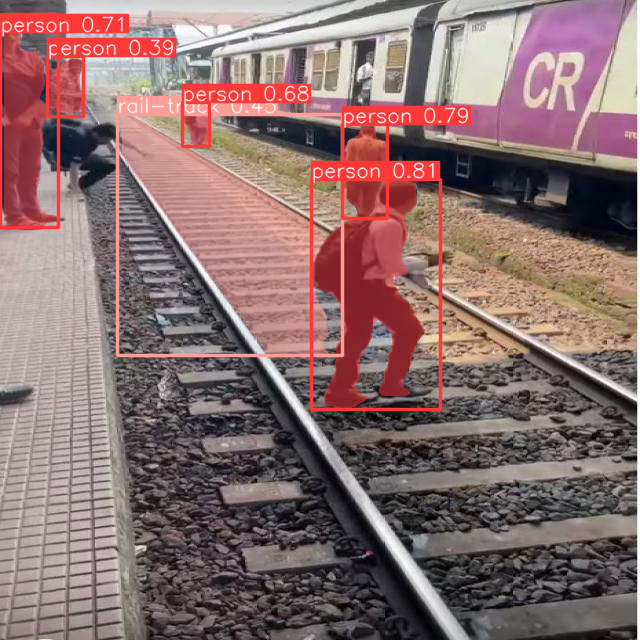

In [12]:
src = "/root/42028/Assignment3/yolo/data/train/images/Ekran-goruntusu-2024-01-04-103247_jpg.rf.85462eb5d24bbbf9ce360bf6f1fdf624.jpg"

# Run inference
res = model.predict(source=src, conf=0.3, show_boxes=False)

# Visualize the results
for i, r in enumerate(res):
    # Plot results image
    im_bgr = r.plot()  # BGR-order numpy array
    im_rgb = Image.fromarray(im_bgr[..., ::-1])  # RGB-order PIL image

    # Show results to screen (in supported environments)
    r.show()

### 5. Roboflow model

In [5]:
model = version.model

In [12]:
# Infer on a local image
src = "/root/42028/Assignment3/yolo/data/test/images/rs05873_jpg.rf.7313f689aea4a9aa5ec41e669de215df.jpg"
print(model.predict(src).json())

{'predictions': [{'x': 294.5, 'y': 362.5, 'width': 107.0, 'height': 555.0, 'confidence': 0.933685302734375, 'class': 'rail-track', 'points': [{'x': 293.0, 'y': 85.0}, {'x': 292.0, 'y': 86.0}, {'x': 292.0, 'y': 89.0}, {'x': 291.0, 'y': 90.0}, {'x': 291.0, 'y': 92.0}, {'x': 290.0, 'y': 93.0}, {'x': 290.0, 'y': 95.0}, {'x': 289.0, 'y': 96.0}, {'x': 289.0, 'y': 101.0}, {'x': 290.0, 'y': 102.0}, {'x': 290.0, 'y': 112.0}, {'x': 289.0, 'y': 113.0}, {'x': 289.0, 'y': 115.0}, {'x': 290.0, 'y': 116.0}, {'x': 290.0, 'y': 118.0}, {'x': 289.0, 'y': 119.0}, {'x': 289.0, 'y': 123.0}, {'x': 288.0, 'y': 124.0}, {'x': 288.0, 'y': 144.0}, {'x': 287.0, 'y': 145.0}, {'x': 287.0, 'y': 148.0}, {'x': 286.0, 'y': 149.0}, {'x': 286.0, 'y': 150.0}, {'x': 285.0, 'y': 151.0}, {'x': 285.0, 'y': 153.0}, {'x': 284.0, 'y': 154.0}, {'x': 284.0, 'y': 181.0}, {'x': 283.0, 'y': 182.0}, {'x': 283.0, 'y': 184.0}, {'x': 282.0, 'y': 185.0}, {'x': 282.0, 'y': 187.0}, {'x': 281.0, 'y': 188.0}, {'x': 281.0, 'y': 191.0}, {'x': 28

In [13]:
masks = model.predict(src).json()

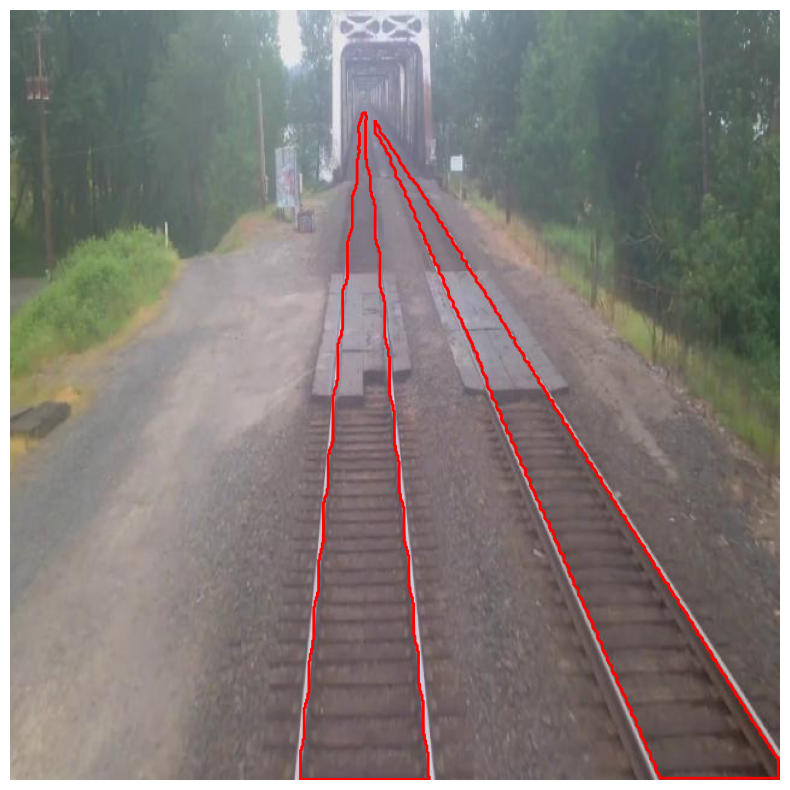

In [14]:
import json
import cv2
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

# Load the image
image_path = masks["predictions"][0]["image_path"]
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Plot the image
plt.figure(figsize=(10, 10))
plt.imshow(image)

# Plot each mask
for prediction in masks["predictions"]:
    points = prediction["points"]
    polygon = Polygon([(point["x"], point["y"]) for point in points], closed=True, edgecolor='r', facecolor='none', linewidth=2)
    plt.gca().add_patch(polygon)

plt.axis('off')
plt.show()